<a href="https://colab.research.google.com/github/himanshututeja1998/Recommendation-System/blob/master/RecommendationItemItemSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the necessary packages.

# Python Imaging Library (abbreviated as PIL) is a free library in Python. 
# It adds support for opening, manipulating, and saving many different image file formats.
from PIL import Image  

# you can send HTTP request and response using requests library in python 
import requests

# io module provides an interface for stream handling 
from io import BytesIO

# data visualisation library -> matplotlib 
import matplotlib.pyplot as plt

# numerical computation library in python 
import numpy as np

# data gathering and processing using pandas 
import pandas as pd

# issue warning in code if needed 
import warnings

# used for web scrapping 
from bs4 import BeautifulSoup

# natural language toolkit used for language processing 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk

# scikit learn library for machine learning 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack

# Other libraries 
import math
import time
import re
import os
from collections import Counter

# Data visualisation libraries 
import seaborn as sns
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
data = pd.read_json('/content/gdrive/My Drive/tops_fashion.json')
data.head()

asin  ...                                              title
0  B016I2TS4W  ...  Minions Como Superheroes Ironman Long Sleeve R...
1  B01N49AI08  ...                      FIG Clothing Womens Izo Tunic
2  B01JDPCOHO  ...                        FIG Clothing Womens Won Top
3  B01N19U5H5  ...  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...
4  B004GSI2OS  ...  Featherlite Ladies' Long Sleeve Stain Resistan...

[5 rows x 19 columns]

In [4]:
print ('Number of data points : ', data.shape[0], \
       'Number of features/variables:', data.shape[1])

Number of data points :  183138 Number of features/variables: 19



Terminology:


*  What is a dataset? 
*  Rows and columns 


*   Data-point 


* Feature/variable 










In [5]:
# each product/item has 19 features in the raw dataset.
data.columns # prints column-names or feature-names.

Index(['asin', 'author', 'availability', 'availability_type', 'brand', 'color',
       'editorial_reivew', 'editorial_review', 'formatted_price',
       'large_image_url', 'manufacturer', 'medium_image_url', 'model',
       'product_type_name', 'publisher', 'reviews', 'sku', 'small_image_url',
       'title'],
      dtype='object')



Of these 19 features, we will be using only 6 features in this workshop

    1. asin  ( Amazon standard identification number)

    2. brand ( brand to which the product belongs to )
    3. color ( Color information of apparel, it can contain many colors as   a value ex: red and black stripes ) 
    4. product_type_name (type of the apperal, ex: SHIRT/TSHIRT )
    5. medium_image_url  ( url of the image )
    6. title (title of the product.)
    7. formatted_price (price of the product)



In [0]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [7]:
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])
data.head() # prints the top rows in the table.

Number of data points :  183138 Number of features: 7


asin  ... formatted_price
0  B016I2TS4W  ...            None
1  B01N49AI08  ...            None
2  B01JDPCOHO  ...            None
3  B01N19U5H5  ...            None
4  B004GSI2OS  ...          $26.26

[5 rows x 7 columns]

Missing data for various features.

Basic stats for the feature: product_type_name


In [8]:
# We have total 72 unique type of product_type_names
print(data['product_type_name'].describe())

# 91.62% (167794/183138) of the products are shirts,


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [9]:
# names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [10]:
# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

Basic stats for the feature: brand

In [11]:
# there are 10577 unique brands
print(data['brand'].describe())

# 183138 - 182987 = 151 missing values.

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [12]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]


Basic stats for the feature: color


In [13]:

print(data['color'].describe())


# we have 7380 unique colors
# 7.2% of products are black in color
# 64956 of 183138 products have brand information. That's approx 35.4%.

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [14]:
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]


Basic stats for the feature: formatted_price


In [15]:
 
print(data['formatted_price'].describe())

# Only 28,395 (15.5% of whole data) products with price information

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [16]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

Basic stats for the feature: title


In [17]:
print(data['title'].describe())

# All of the products have a title. 
# Titles are fairly descriptive of what the product is. 
# We use titles extensively in this workshop 
# as they are short and informative.


count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


data.to_pickle('/content/gdrive/My Drive/180k_apperal_data')

In [0]:
data.to_pickle('180k_apparel_data')

 We save data files at every major step in our processing in "pickle" files. If you are stuck anywhere (or) if some code takes too long to run on your laptop, you may use the pickle files we give you to speed things up.

In [21]:
# consider products which have price information
# data['formatted_price'].isnull() => gives the information 
#about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

Number of data points After eliminating price=NULL : 28395



We brought down the number of data points from 183K to 28K.
We are processing only 28K points so that most of the workshop participants can run this code on thier laptops in a reasonable amount of time. 
For those of you who have powerful computers and some time to spare, you are recommended to use all of the 183K images.

In [0]:
data.to_pickle('28k_apparel_data')


**Remove near duplicate items¶**

Understand about duplicates

In [24]:
# read data from pickle file from previous stage
data = pd.read_pickle('28k_apparel_data')

# find number of products that have duplicate titles.
print(sum(data.duplicated('title')))
# we have 2325 products which have same title


2326


In [0]:
# read data from pickle file from previous stage
data = pd.read_pickle('28k_apparel_data')

In [26]:
data.head()

asin  ... formatted_price
4   B004GSI2OS  ...          $26.26
6   B012YX2ZPI  ...           $9.99
11  B001LOUGE4  ...          $11.99
15  B003BSRPB0  ...          $20.54
21  B014ICEDNA  ...           $7.50

[5 rows x 7 columns]

In [27]:
# Remove All products with very few words in title
y = lambda x: len(x.split())>4
data_sorted = data[data['title'].apply(y)]
print("After removal of products with short description:", data_sorted.shape[0]) 

After removal of products with short description: 27958


In [28]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False) 
data_sorted.head()

asin  ... formatted_price
61973   B06Y1KZ2WB  ...          $24.99
133820  B010RV33VE  ...          $18.19
81461   B01DDSDLNS  ...          $21.58
75995   B00X5LYO9Y  ...          $15.91
151570  B00WPJG35K  ...          $14.32

[5 rows x 7 columns]


Some examples of dupliacte titles that differ only in the last few words.¶

Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt

In [0]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [0]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [0]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]


We removed the dupliactes which differ only at the end

In [32]:
print('Number of data points : ', data.shape[0])

Number of data points :  17597


In [0]:
data.to_pickle('17k_apperal_data')

Remove duplicates : Part 2


In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

In [0]:
data = pd.read_pickle('17k_apperal_data')

In [0]:
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [0]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [37]:
print('Number of data points after stage two of dedupe: ',data.shape[0])
# from 17k apperals we reduced to 16k apperals

Number of data points after stage two of dedupe:  16439


In [0]:
data.to_pickle('16k_apperal_data')
# Storing these products in a pickle file
# candidates who wants to download these files instead 
# of 180K they can download and use them from the Google Drive folder.

**6. Text pre-processing**

In [43]:
data = pd.read_pickle('16k_apperal_data')

# NLTK download stop words. [RUN ONLY ONCE]
# goto Terminal (Linux/Mac) or Command-Prompt (Window) 
# In the temrinal, type these commands
# $python3
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [46]:
# we use the list of stop words that are downloaded from nltk lib.

import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
list of stop words: {"shan't", 'be', "doesn't", 'mustn', 'below', 'here', "hasn't", 'then', 'until', "you're", 'we', 'an', 'all', "shouldn't", 'during', 'm', 'about', "she's", 'himself', 'few', 'both', 'when', 'the', "won't", 'in', 'from', 'hers', 'had', "it's", 'can', 'weren', "don't", 'under', 'again', "that'll", 'further', 'does', 'down', 'by', 'don', "isn't", 'off', 'how', 'wouldn', 'theirs', 'needn', 'other', 'has', 'to', 'while', "wasn't", 'did', 'just', 'your', 'hadn', 't', 'herself', 'ourselves', 'themselves', 'such', 'between', 'their', 'its', "couldn't", 'they', 'were', 'no', 'won', 'because', 'with', 'too', 'over', 'couldn', 'as', 'at', 'ours', 'she', 'aren', "wouldn't", 'ain', 'me', 'are', 'now', 'll', 've', 'same', 'into', 'having', 'doing', 'if', "didn't", "hadn't", 'isn', 'these', 'wasn', 'it', 'will', "mightn't", "mustn't", 'for', 'whom', 'this', 'nor', 're', '

In [47]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

5.923870999999963 seconds


In [48]:
data.head()

asin  ... formatted_price
4   B004GSI2OS  ...          $26.26
6   B012YX2ZPI  ...           $9.99
11  B001LOUGE4  ...          $11.99
15  B003BSRPB0  ...          $20.54
27  B014ICEJ1Q  ...           $7.39

[5 rows x 7 columns]

In [0]:
data.to_pickle('16k_apperal_data_preprocessed')

**Stemming**

In [50]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))


# We tried using stemming on our titles and it didnot work very w

argu
fish


**[8] Text based product similarity**


In [51]:
data = pd.read_pickle('16k_apperal_data_preprocessed')
data.head()

asin  ... formatted_price
4   B004GSI2OS  ...          $26.26
6   B012YX2ZPI  ...           $9.99
11  B001LOUGE4  ...          $11.99
15  B003BSRPB0  ...          $20.54
27  B014ICEJ1Q  ...           $7.39

[5 rows x 7 columns]

In [0]:
# Utility Functions which we will use through the rest of the workshop.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)


**[8.2] Bag of Words (BoW) on product titles.**


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus

# What is a sparse vector?

# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc



(16439, 12694)

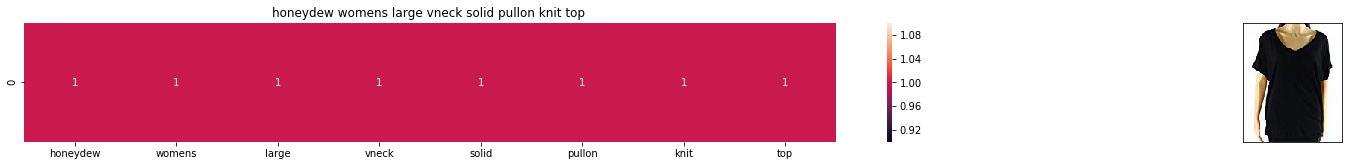

ASIN : B0758RM67F
Brand: Honeydew
Title: honeydew womens large vneck solid pullon knit top 
Euclidean similarity with the query image : 0.0


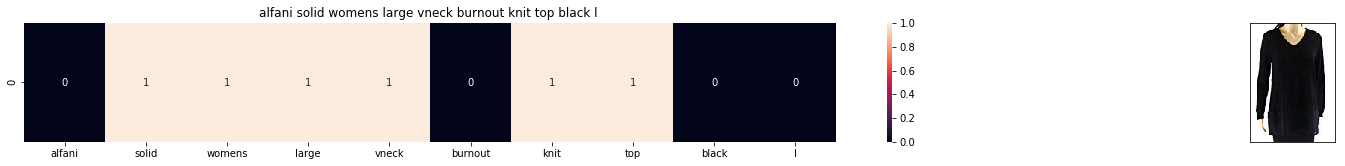

ASIN : B07318KMQZ
Brand: Alfani
Title: alfani solid womens large vneck burnout knit top black l 
Euclidean similarity with the query image : 2.23606797749979


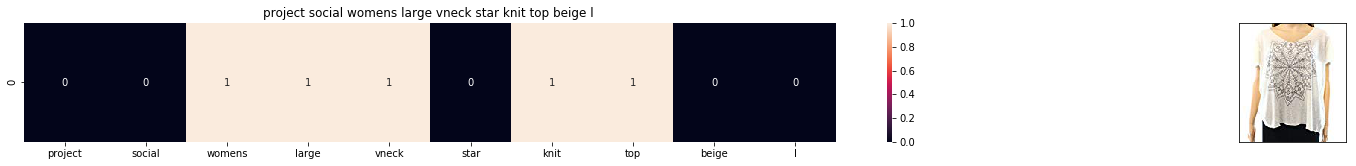

ASIN : B0731BJWGF
Brand: Project Social T
Title: project social womens large vneck star knit top beige l 
Euclidean similarity with the query image : 2.6457513110645907


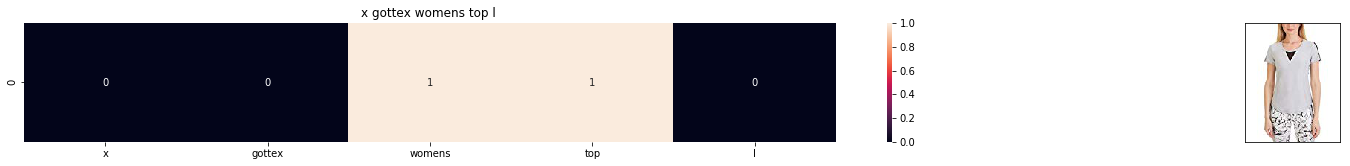

ASIN : B073M78XLP
Brand: X by Gottex
Title: x gottex womens top l 
Euclidean similarity with the query image : 2.6457513110645907


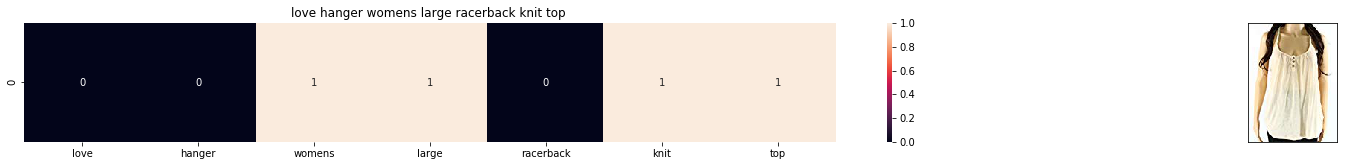

ASIN : B0758SCPCZ
Brand: Love on A Hanger
Title: love hanger womens large racerback knit top 
Euclidean similarity with the query image : 2.6457513110645907


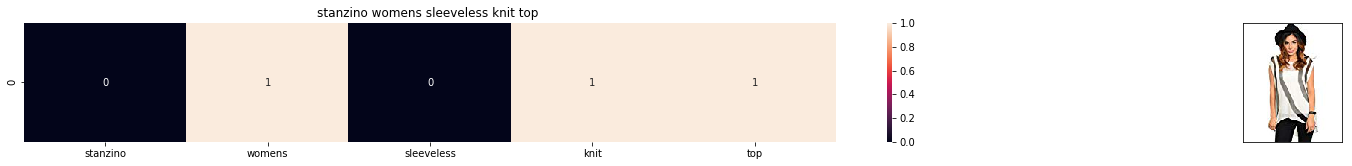

ASIN : B00OZPOQF6
Brand: Stanzino
Title: stanzino womens sleeveless knit top 
Euclidean similarity with the query image : 2.6457513110645907


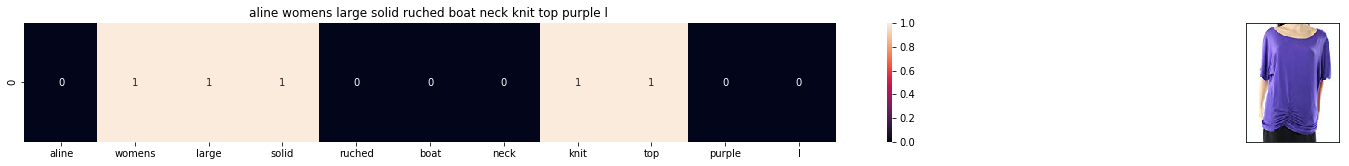

ASIN : B073S6RVLB
Brand: a_line
Title: aline womens large solid ruched boat neck knit top purple l 
Euclidean similarity with the query image : 2.8284271247461903


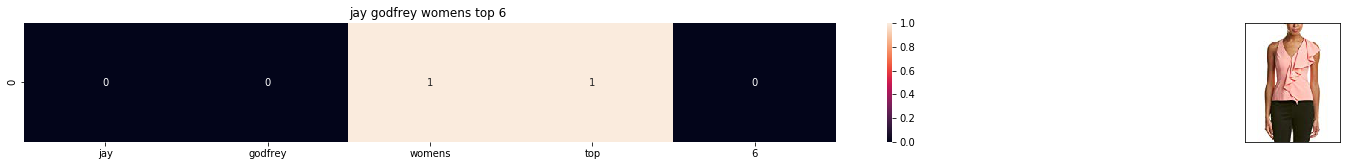

ASIN : B06XJSV69R
Brand: Jay Godfrey
Title: jay godfrey womens top 6 
Euclidean similarity with the query image : 2.8284271247461903


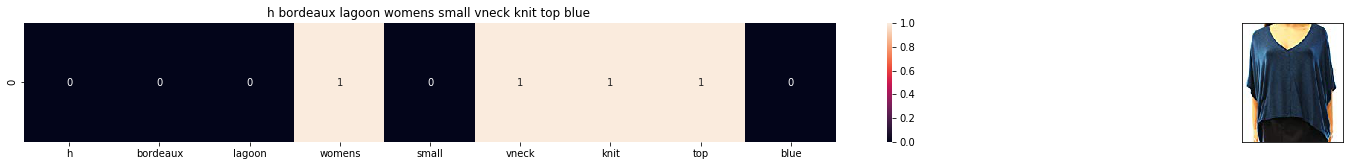

ASIN : B071VW54VR
Brand: H By Bordeaux
Title: h bordeaux lagoon womens small vneck knit top blue 
Euclidean similarity with the query image : 2.8284271247461903


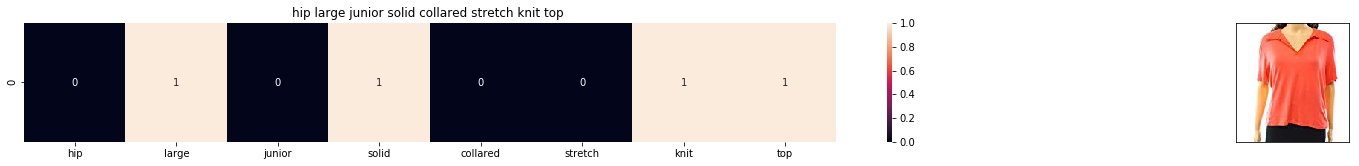

ASIN : B0758NZXPF
Brand: Hip
Title: hip large junior solid collared stretch knit top 
Euclidean similarity with the query image : 2.8284271247461903


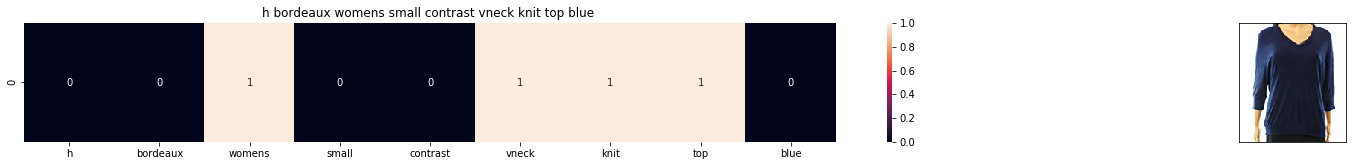

ASIN : B07319JPQN
Brand: H By Bordeaux
Title: h bordeaux womens small contrast vneck knit top blue 
Euclidean similarity with the query image : 2.8284271247461903


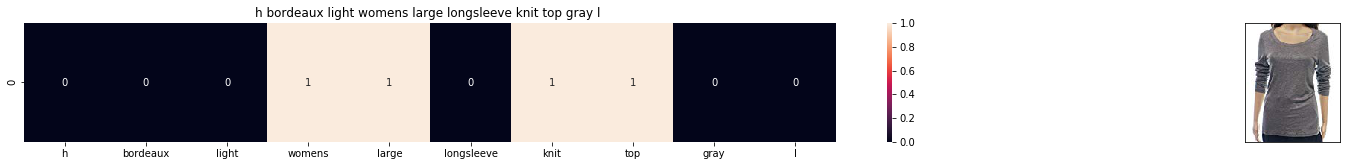

ASIN : B07284827X
Brand: H By Bordeaux
Title: h bordeaux light womens large longsleeve knit top gray l 
Euclidean similarity with the query image : 2.8284271247461903


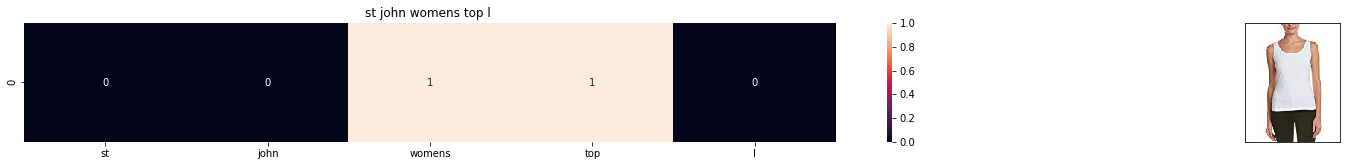

ASIN : B073X5Q8TF
Brand: St. John
Title: st john womens top l 
Euclidean similarity with the query image : 2.8284271247461903


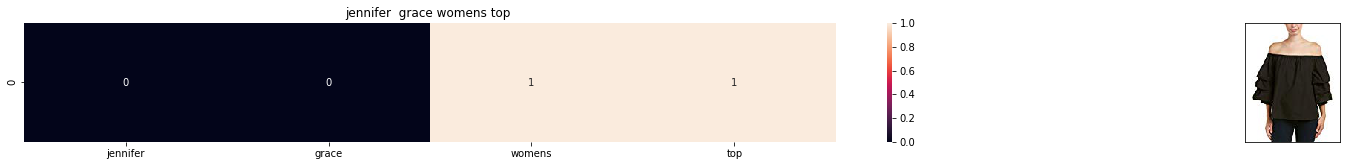

ASIN : B07592CNV7
Brand: Jennifer & Grace
Title: jennifer  grace womens top 
Euclidean similarity with the query image : 2.8284271247461903


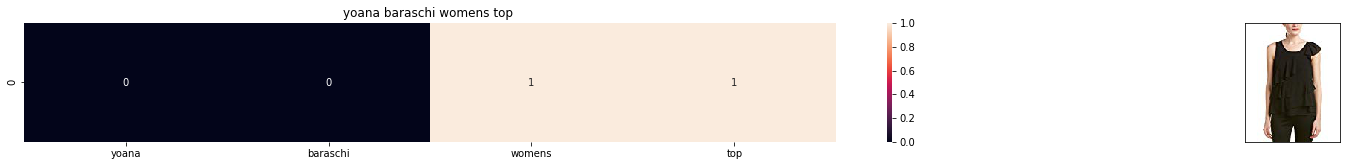

ASIN : B07119QSTX
Brand: Yoana Baraschi
Title: yoana baraschi womens top 
Euclidean similarity with the query image : 2.8284271247461903


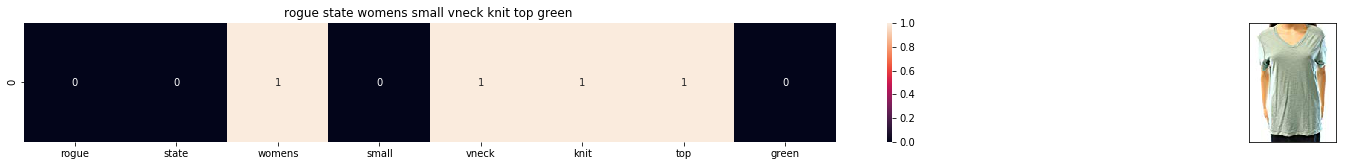

ASIN : B01MV37DJE
Brand: Rogue State
Title: rogue state womens small vneck knit top green 
Euclidean similarity with the query image : 2.8284271247461903


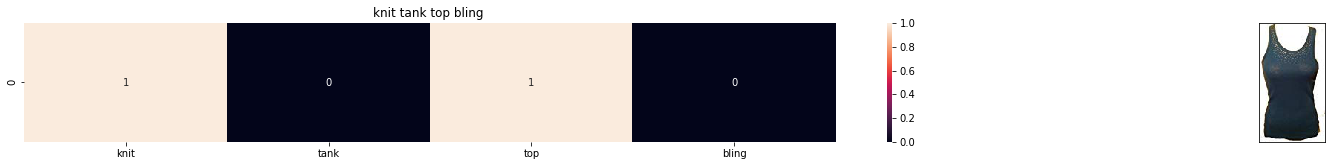

ASIN : B01NBQSBMN
Brand: Pink Cattlelac
Title: knit tank top bling 
Euclidean similarity with the query image : 2.8284271247461903


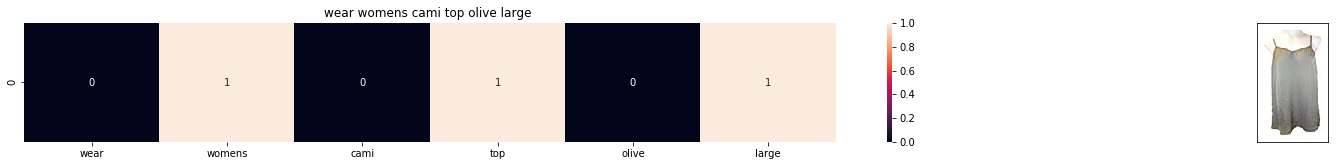

ASIN : B072QW11V8
Brand: Who What Wear
Title: wear womens cami top olive large 
Euclidean similarity with the query image : 2.8284271247461903


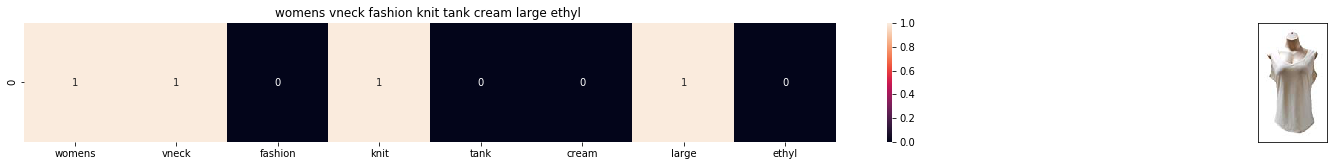

ASIN : B06ZZ39RR3
Brand: Ethyl
Title: womens vneck fashion knit tank cream large ethyl 
Euclidean similarity with the query image : 2.8284271247461903


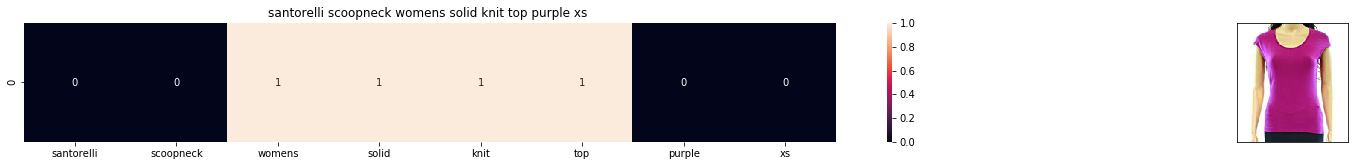

ASIN : B074QW18HZ
Brand: Santorelli
Title: santorelli scoopneck womens solid knit top purple xs 
Euclidean similarity with the query image : 2.8284271247461903


In [54]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12566, 20) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.

#try 12566
#try 931

**[8.5] TF-IDF based product similarity**


In [0]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

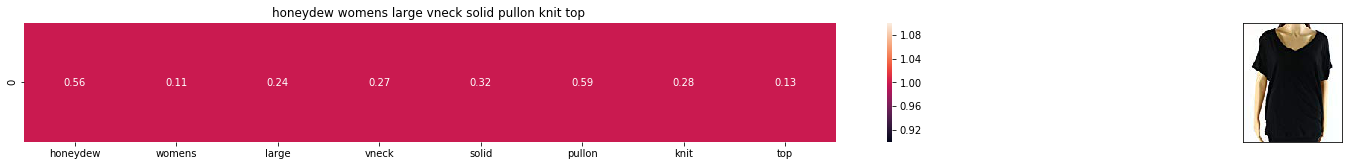

ASIN : B0758RM67F
BRAND : Honeydew
Eucliden distance from the given image : 0.0


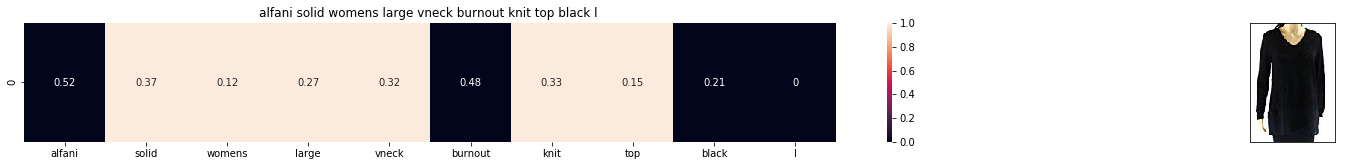

ASIN : B07318KMQZ
BRAND : Alfani
Eucliden distance from the given image : 1.096802419798858


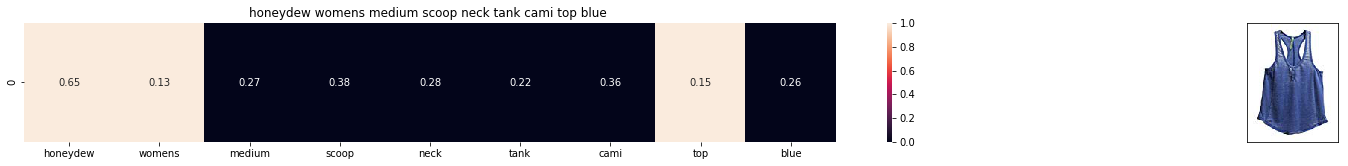

ASIN : B01M3YPYKI
BRAND : Honeydew
Eucliden distance from the given image : 1.1008534329693327


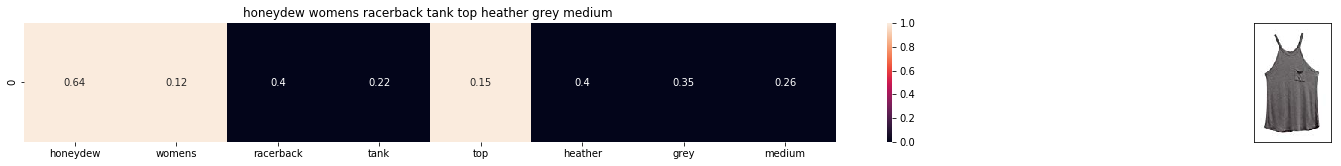

ASIN : B06Y3Z8VKY
BRAND : Honeydew
Eucliden distance from the given image : 1.1071671003040484


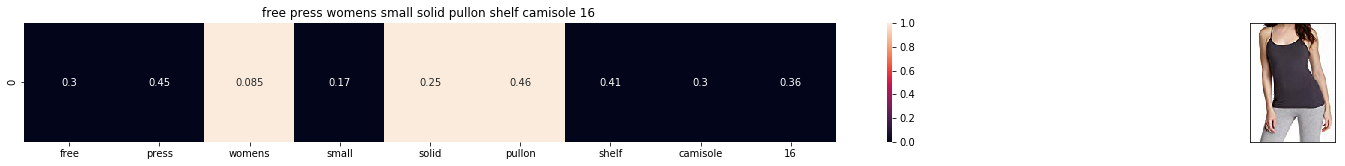

ASIN : B0758ZB8W7
BRAND : Free Press
Eucliden distance from the given image : 1.1284743647196829


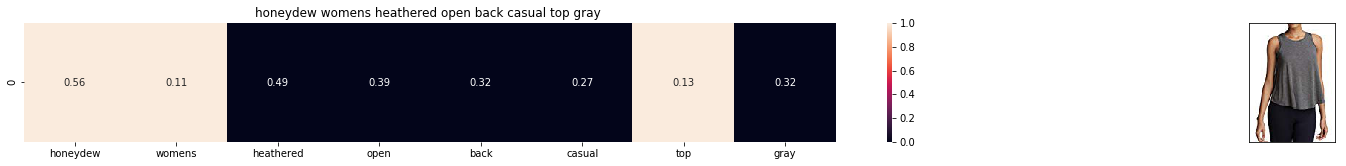

ASIN : B01M3Y4Q4Q
BRAND : Honeydew
Eucliden distance from the given image : 1.1506068694733964


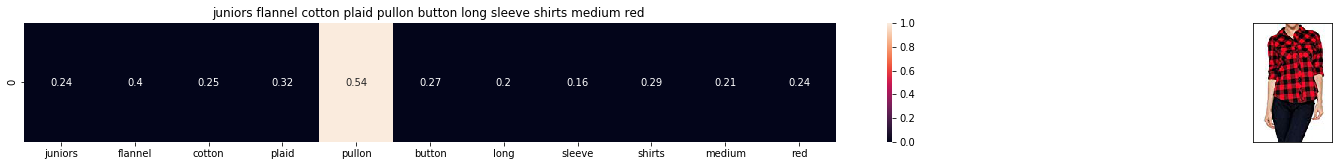

ASIN : B00NTOCDB8
BRAND : Apparel Sense
Eucliden distance from the given image : 1.1670264039378333


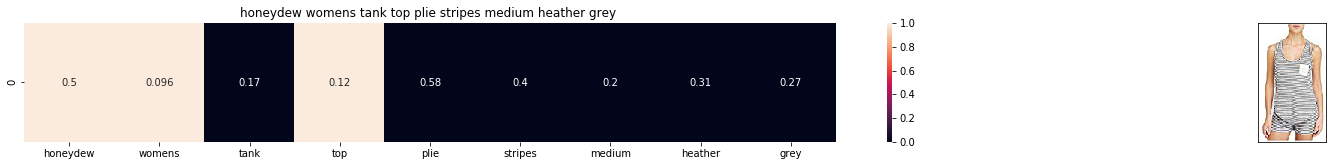

ASIN : B01M3XPCOA
BRAND : Honeydew
Eucliden distance from the given image : 1.1813028974943938


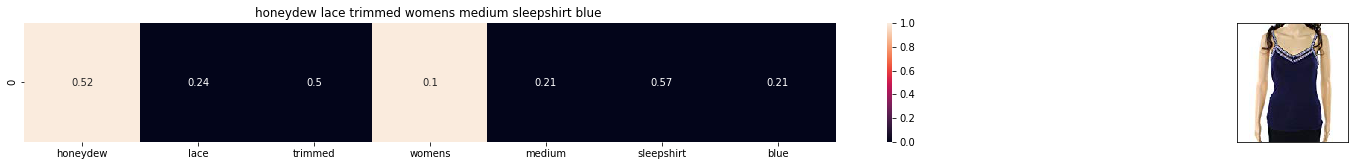

ASIN : B071S9PPDT
BRAND : Honeydew
Eucliden distance from the given image : 1.1849802473186526


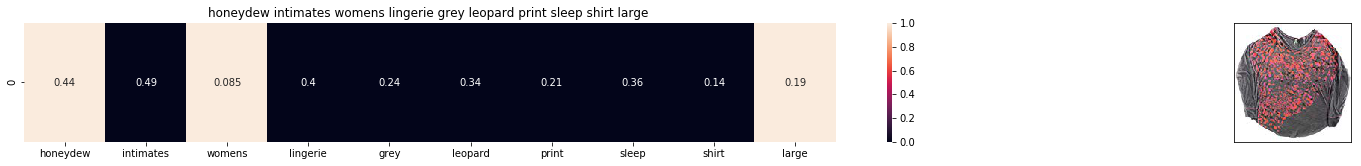

ASIN : B06ZYC5BD5
BRAND : Honeydew
Eucliden distance from the given image : 1.185645717318692


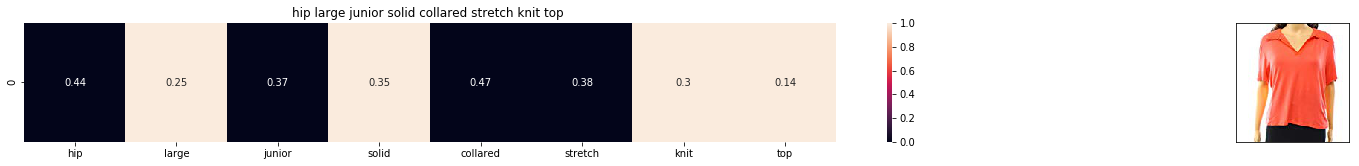

ASIN : B0758NZXPF
BRAND : Hip
Eucliden distance from the given image : 1.2025343295253355


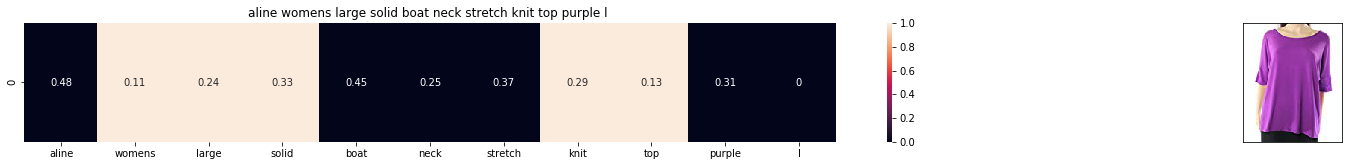

ASIN : B073S6HVB8
BRAND : a_line
Eucliden distance from the given image : 1.2041457548773857


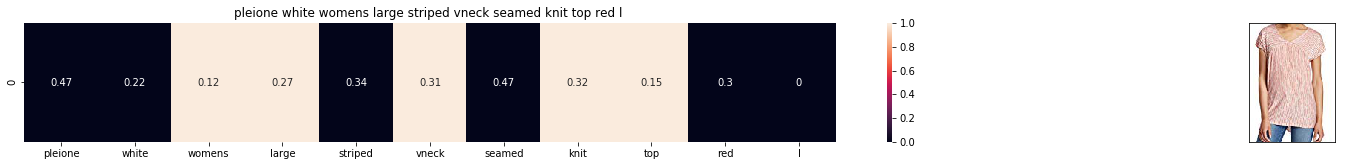

ASIN : B074SY1Y99
BRAND : Pleione
Eucliden distance from the given image : 1.2083775736582347


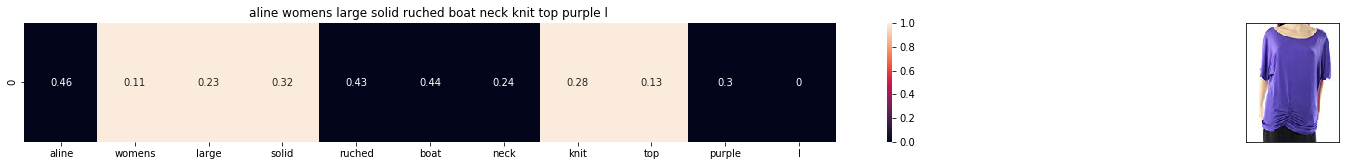

ASIN : B073S6RVLB
BRAND : a_line
Eucliden distance from the given image : 1.2111065661382951


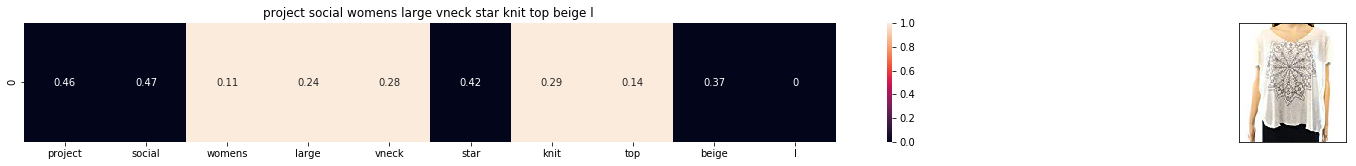

ASIN : B0731BJWGF
BRAND : Project Social T
Eucliden distance from the given image : 1.2266306714713644


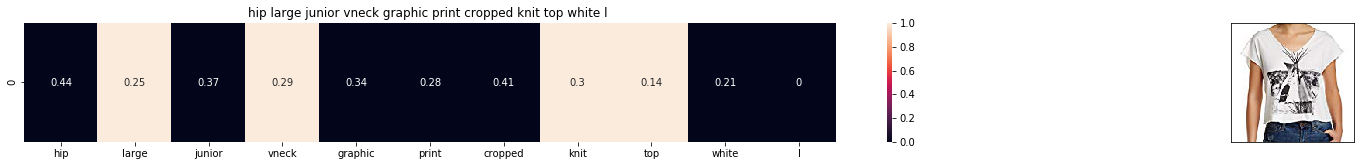

ASIN : B073FJ5LZC
BRAND : Hip
Eucliden distance from the given image : 1.2291804310134824


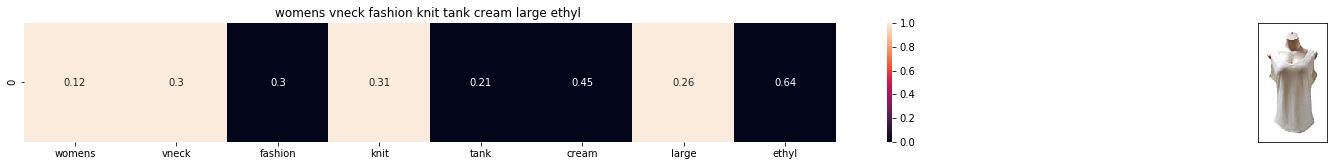

ASIN : B06ZZ39RR3
BRAND : Ethyl
Eucliden distance from the given image : 1.23161914495955


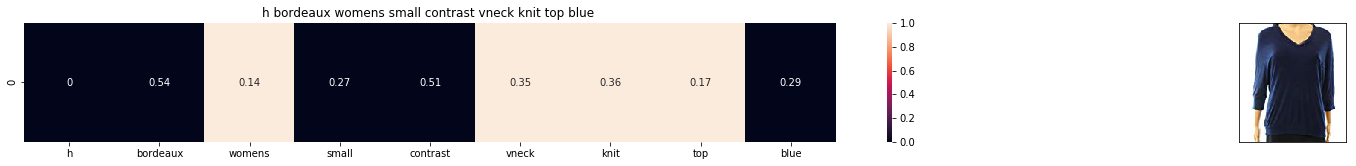

ASIN : B07319JPQN
BRAND : H By Bordeaux
Eucliden distance from the given image : 1.237894665538251


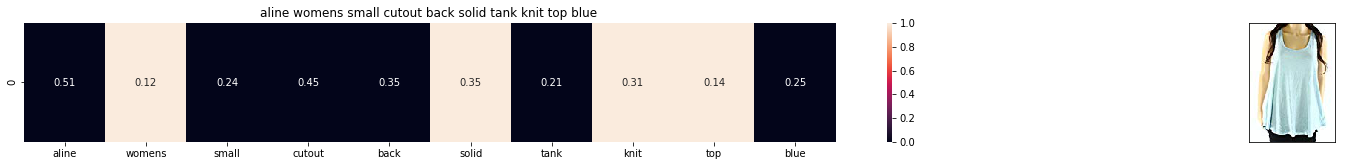

ASIN : B073S7FW73
BRAND : a_line
Eucliden distance from the given image : 1.2379339065736559


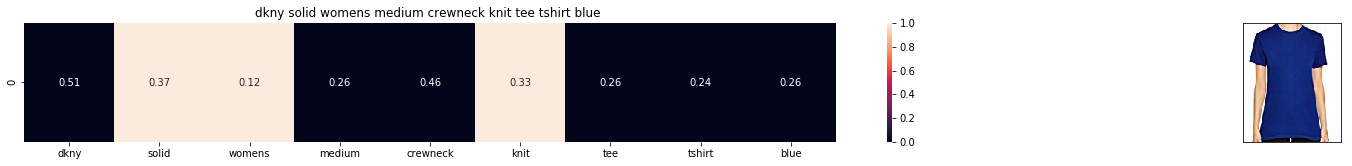

ASIN : B071JRTC33
BRAND : DKNY
Eucliden distance from the given image : 1.2434356801242614


In [56]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12566, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title


**[8.5] IDF based product similarity **


In [0]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [0]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [0]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

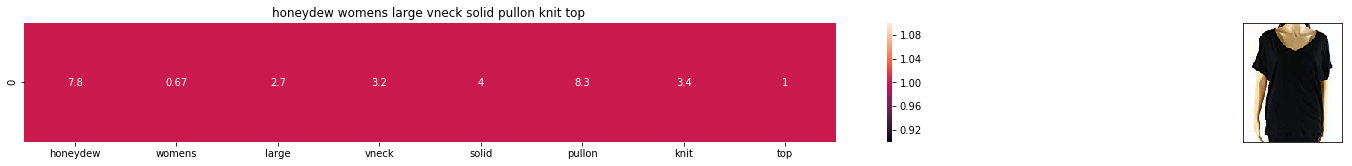

ASIN : B0758RM67F
Brand : Honeydew
euclidean distance from the given image : 0.0


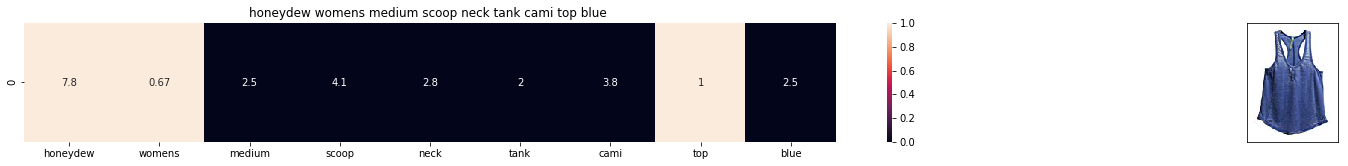

ASIN : B01M3YPYKI
Brand : Honeydew
euclidean distance from the given image : 13.025864633777761


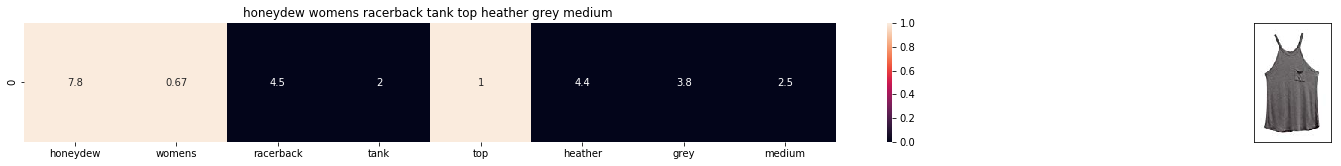

ASIN : B06Y3Z8VKY
Brand : Honeydew
euclidean distance from the given image : 13.349571005705172


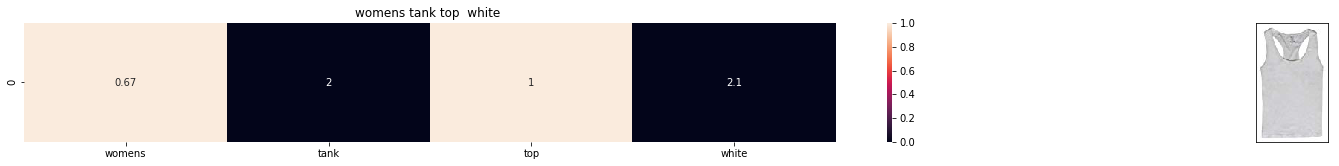

ASIN : B00JPOZ9GM
Brand : Sofra
euclidean distance from the given image : 13.523322420153605


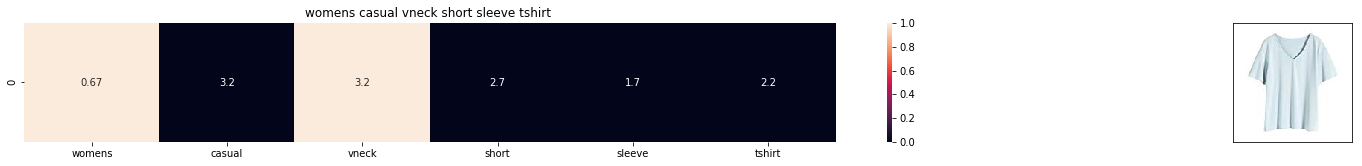

ASIN : B074V45DCX
Brand : Rain
euclidean distance from the given image : 13.806893444993731


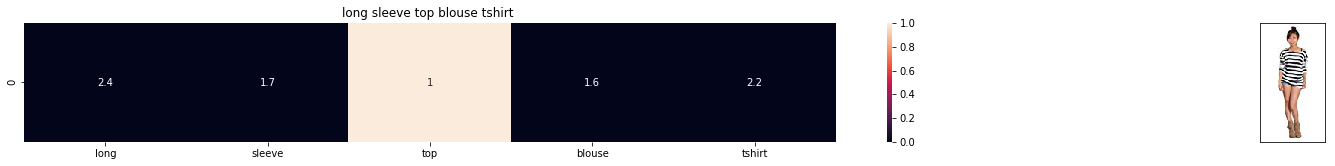

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 13.833719650566946


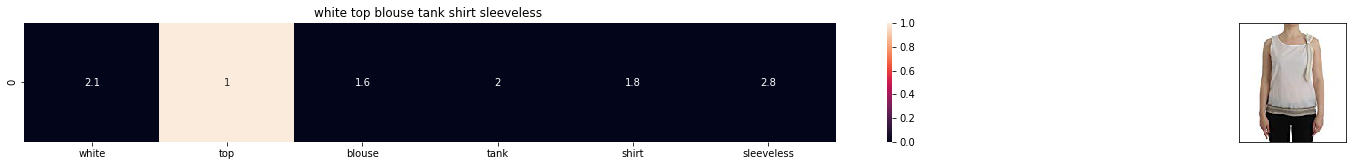

ASIN : B074G5G5RK
Brand : ERMANNO SCERVINO
euclidean distance from the given image : 14.043601383072367


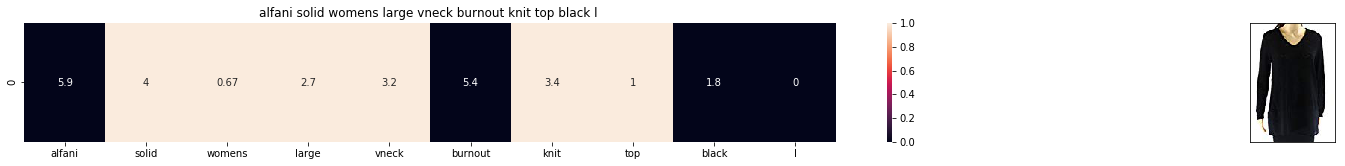

ASIN : B07318KMQZ
Brand : Alfani
euclidean distance from the given image : 14.055041443643642


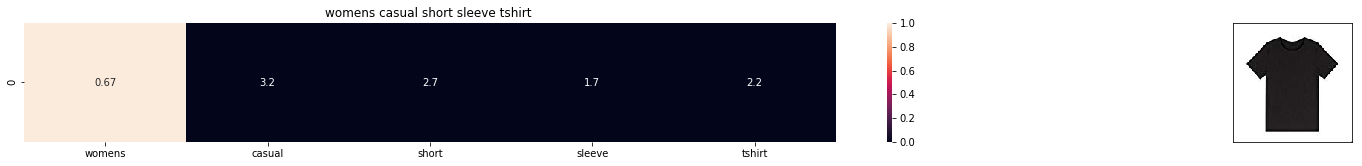

ASIN : B074T9KG9Q
Brand : Rain
euclidean distance from the given image : 14.179076350236057


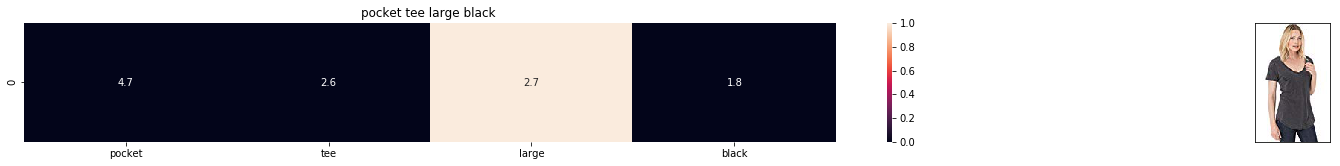

ASIN : B017I2YWUQ
Brand : Z SUPPLY
euclidean distance from the given image : 14.189119638048808


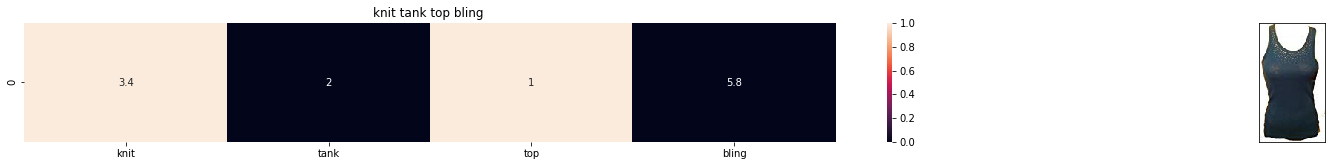

ASIN : B01NBQSBMN
Brand : Pink Cattlelac
euclidean distance from the given image : 14.195242442297301


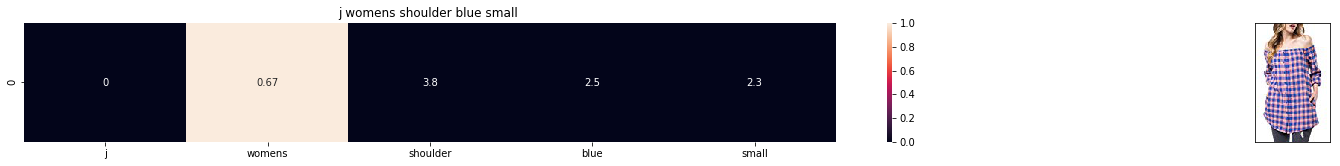

ASIN : B07583CQFT
Brand : Very J
euclidean distance from the given image : 14.206369523604607


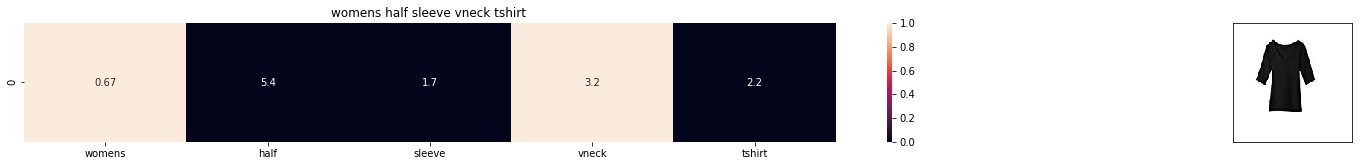

ASIN : B074W2LPYR
Brand : SNOW
euclidean distance from the given image : 14.208495101975535


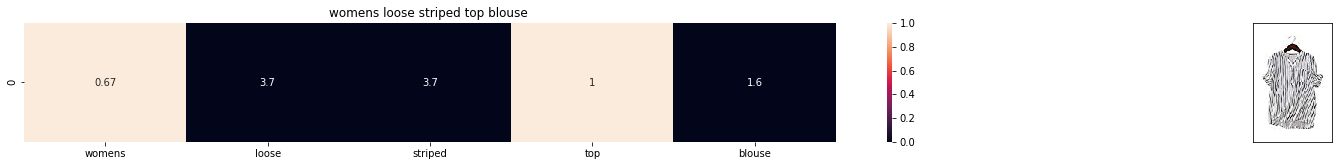

ASIN : B00ZZMYBRG
Brand : HP-LEISURE
euclidean distance from the given image : 14.311325273430699


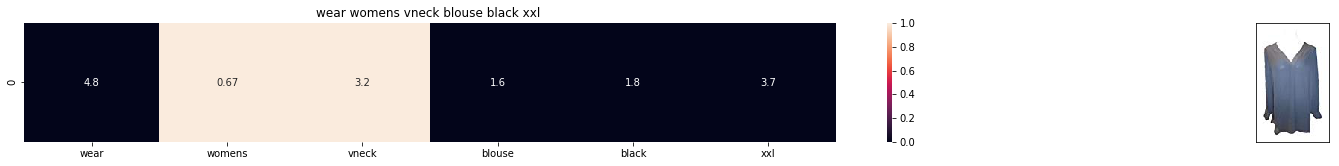

ASIN : B06Y6FH453
Brand : Who What Wear
euclidean distance from the given image : 14.414460885577387


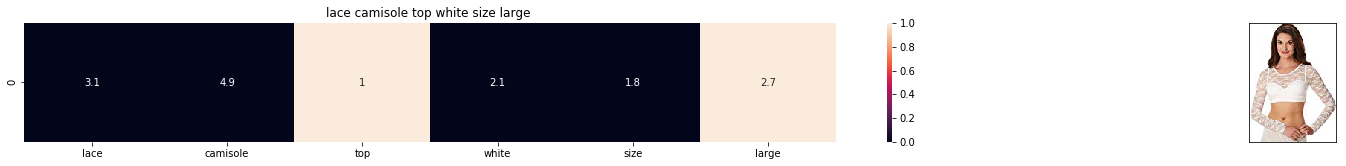

ASIN : B00OLZ5KMS
Brand : Global TV Concepts
euclidean distance from the given image : 14.460421101413107


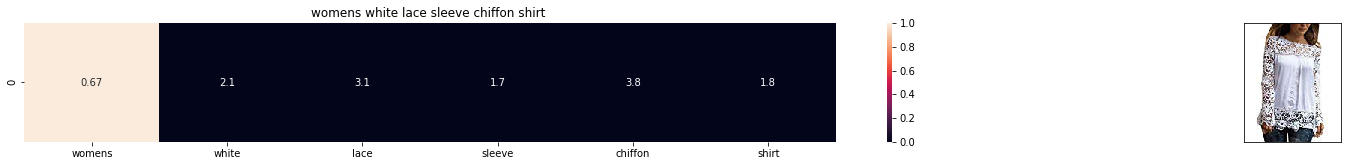

ASIN : B073JVBF1X
Brand : Fuming
euclidean distance from the given image : 14.512825346753976


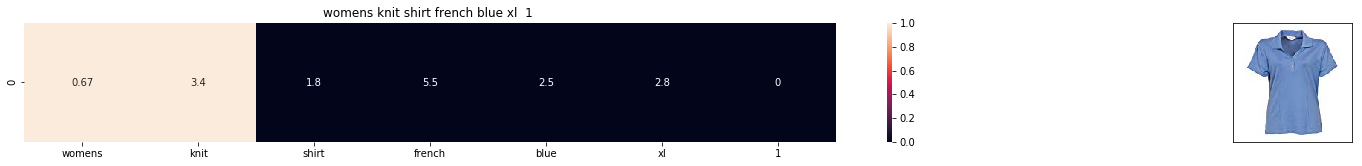

ASIN : B0085CB1JE
Brand : Fashion Seal
euclidean distance from the given image : 14.534921199306204


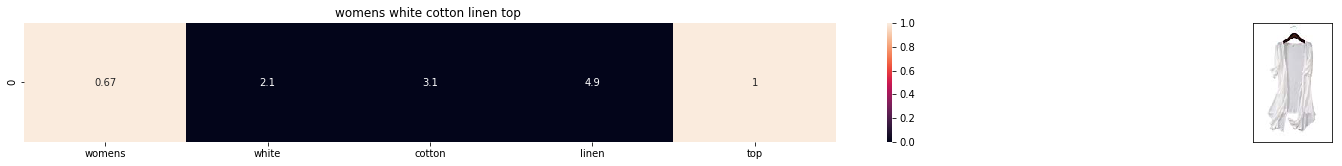

ASIN : B00ZZPR4Y0
Brand : HP-LEISURE
euclidean distance from the given image : 14.577077090290825


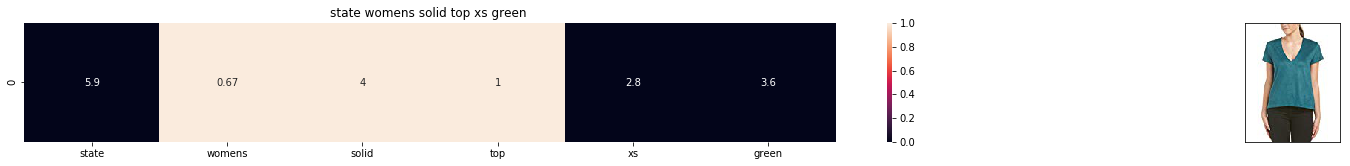

ASIN : B075767XQT
Brand : State of Being
euclidean distance from the given image : 14.627096392099688


In [60]:
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(12566,20)

**[9] Text Semantics based product similarity**

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

'''
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
'''

#if you do NOT have RAM >= 12GB, use the code below.
with open('/content/gdrive/My Drive/word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [0]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [0]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec


**[9.2] Average Word2Vec product similarity.** 


In [0]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


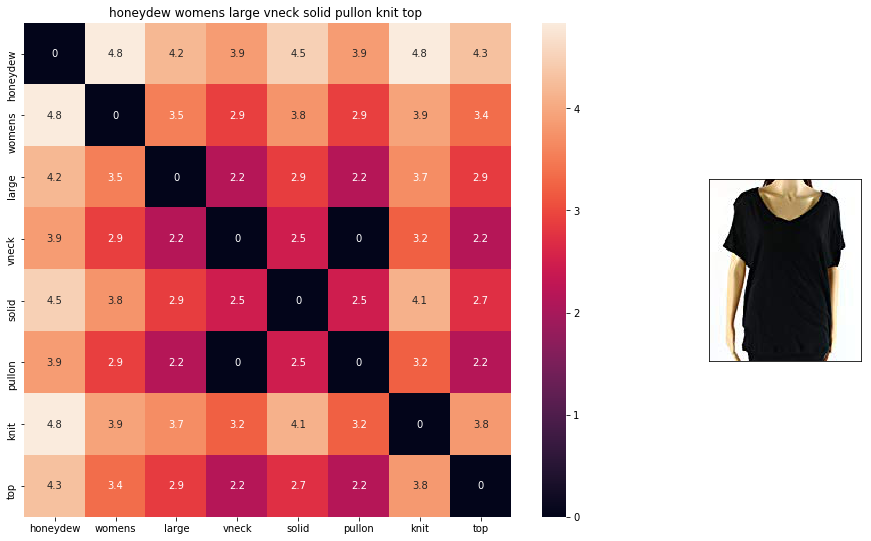

ASIN : B0758RM67F
BRAND : Honeydew
euclidean distance from given input image : 0.0


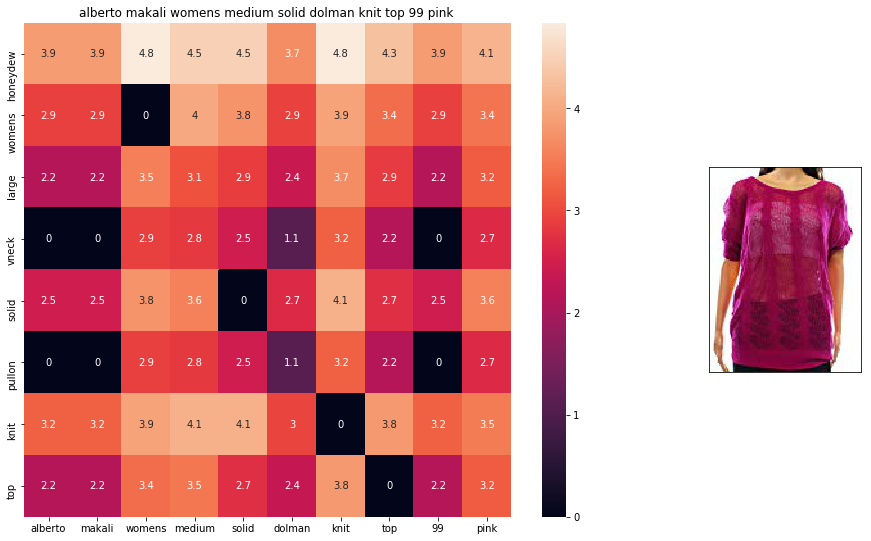

ASIN : B072QF6DX6
BRAND : Alberto Makali
euclidean distance from given input image : 0.6101393


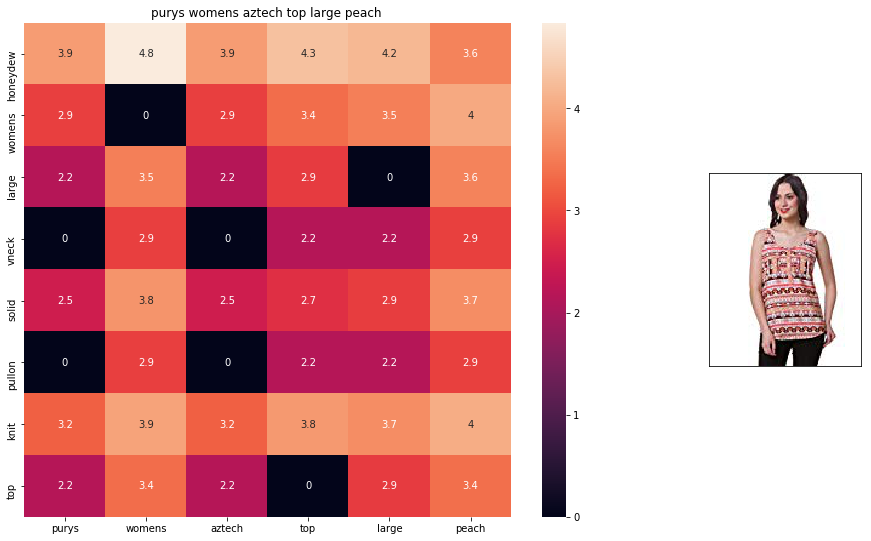

ASIN : B00VSZCUDG
BRAND : Purys
euclidean distance from given input image : 0.6715338


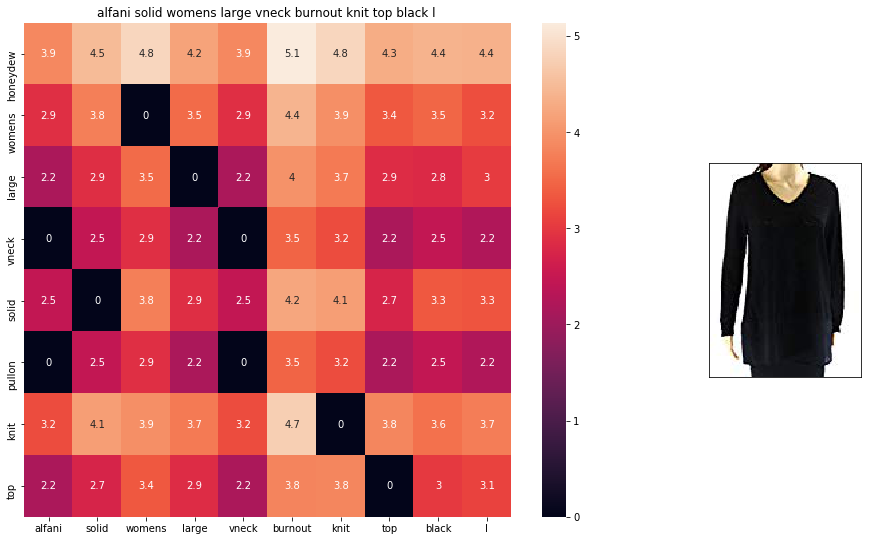

ASIN : B07318KMQZ
BRAND : Alfani
euclidean distance from given input image : 0.6822245


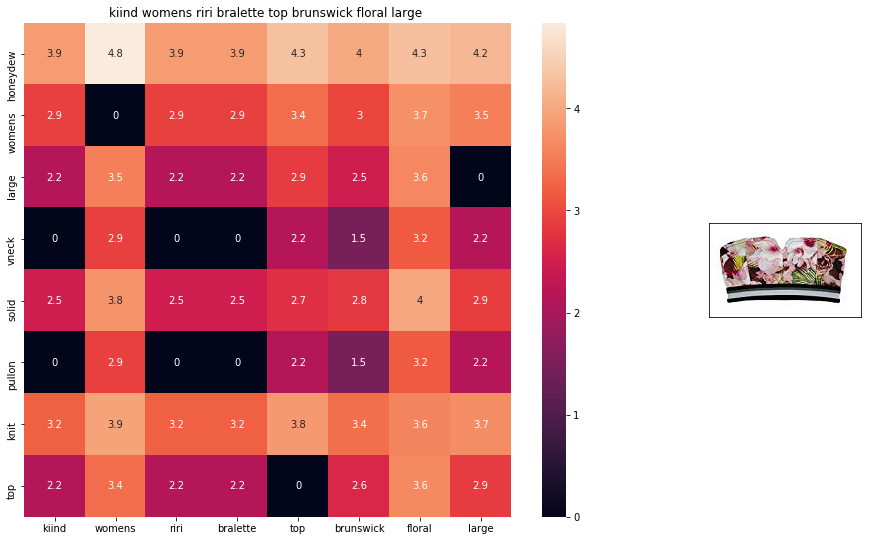

ASIN : B01I7DCWFC
BRAND : KIIND OF
euclidean distance from given input image : 0.69282717


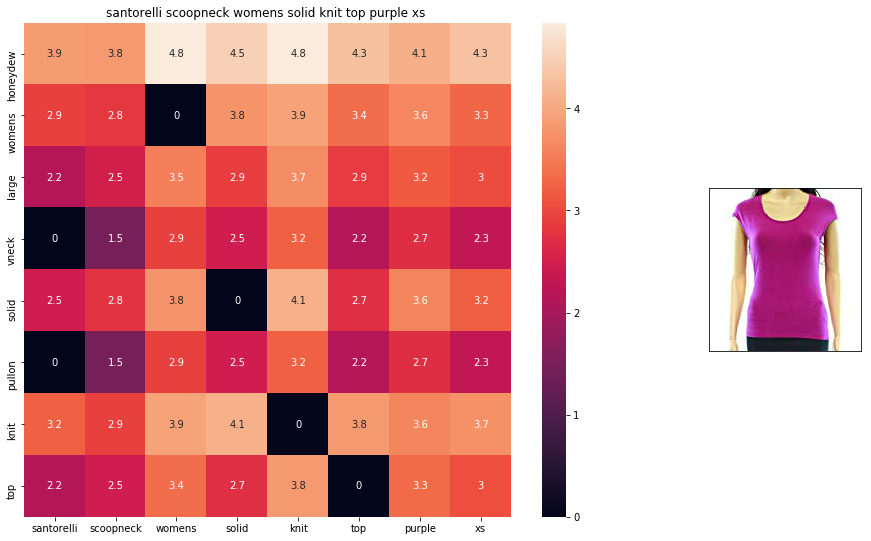

ASIN : B074QW18HZ
BRAND : Santorelli
euclidean distance from given input image : 0.69646513


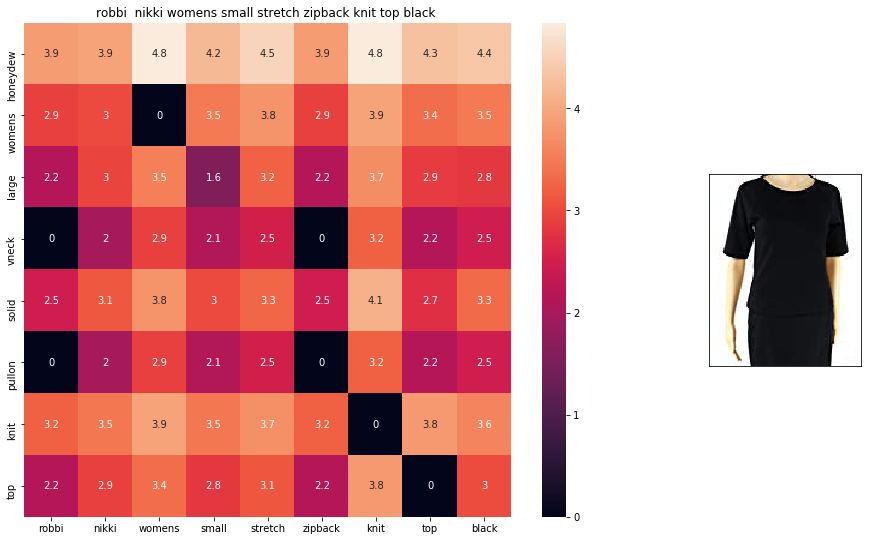

ASIN : B073Q1K8C1
BRAND : Robbi & Nikki
euclidean distance from given input image : 0.7107935


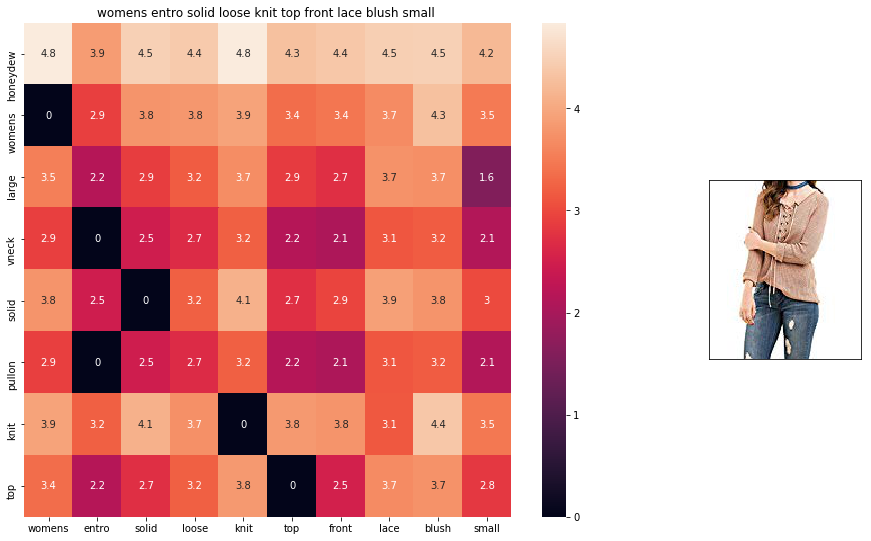

ASIN : B01N2Z7ROW
BRAND : Entro
euclidean distance from given input image : 0.71195066


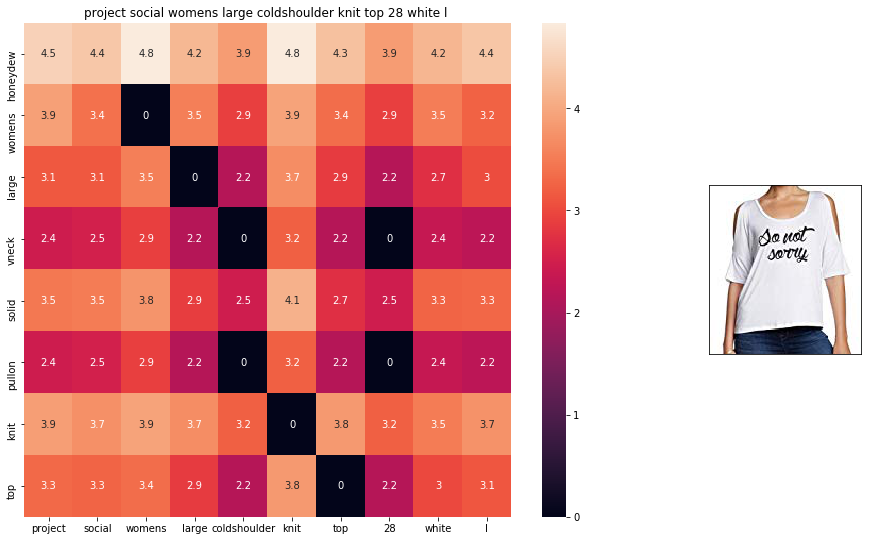

ASIN : B073H14HTF
BRAND : Project Social T
euclidean distance from given input image : 0.71426666


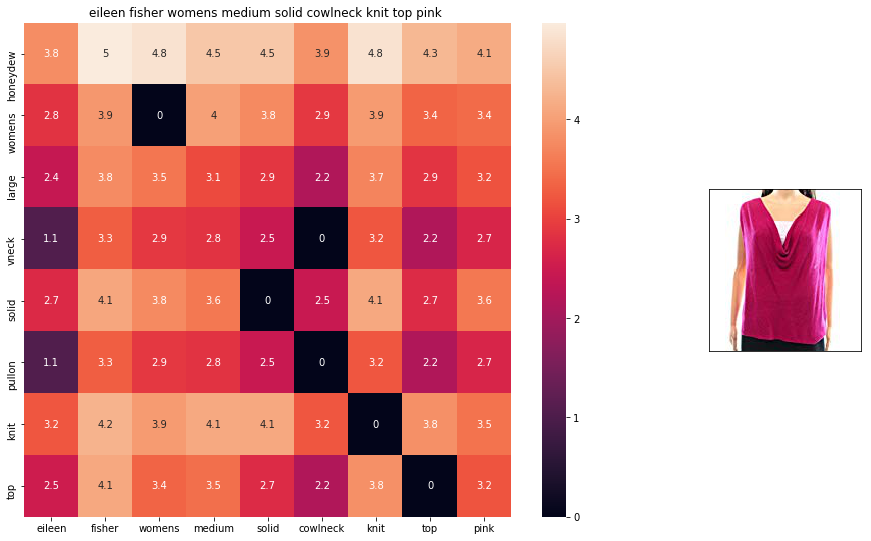

ASIN : B071P1TTB8
BRAND : Eileen Fisher
euclidean distance from given input image : 0.71726567


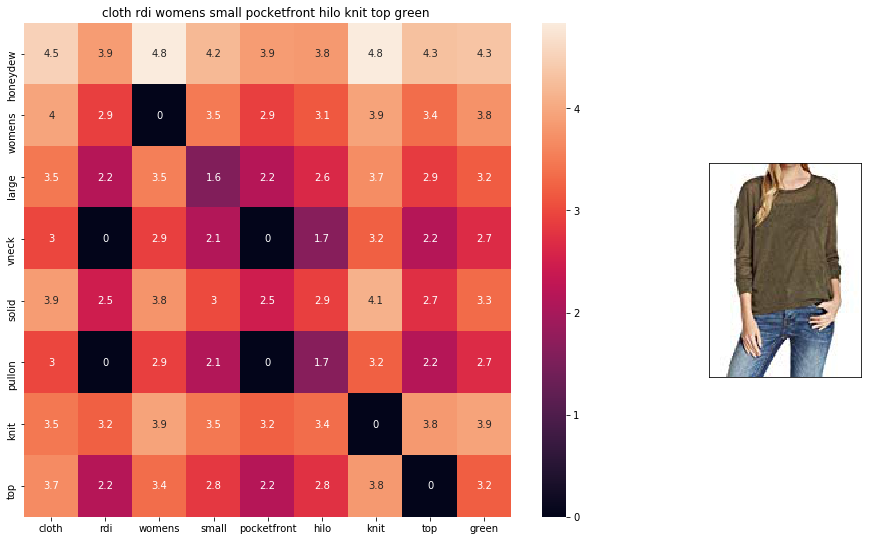

ASIN : B06WD92T4Z
BRAND : Cloth by RDI
euclidean distance from given input image : 0.7287468


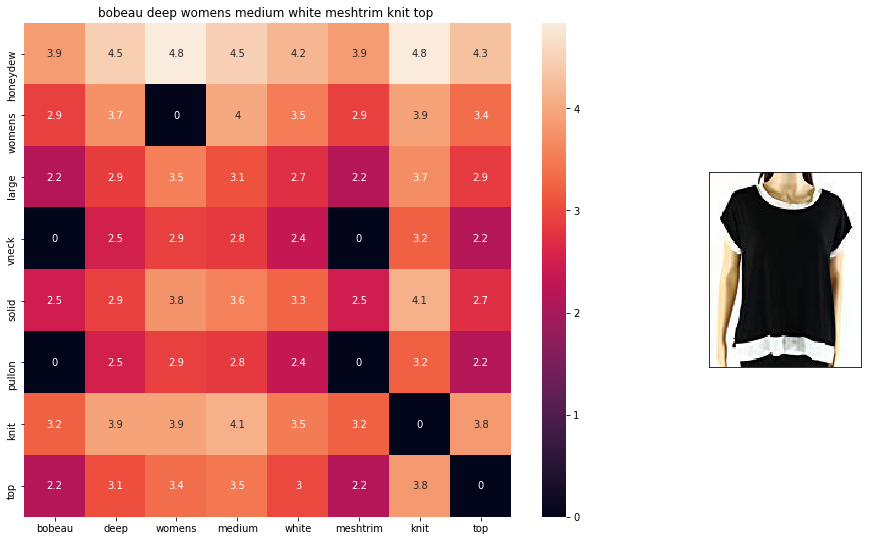

ASIN : B0758WTXZK
BRAND : Bobeau
euclidean distance from given input image : 0.7340961


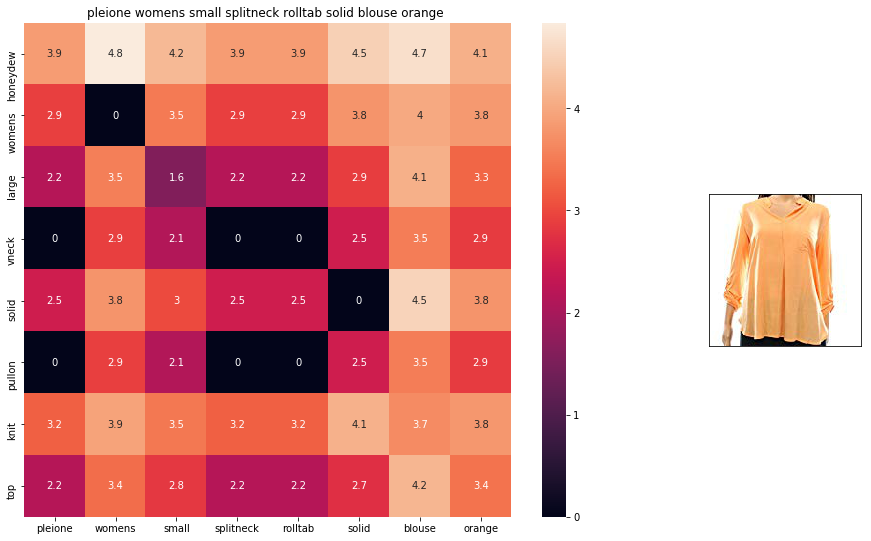

ASIN : B071G16FWF
BRAND : Pleione
euclidean distance from given input image : 0.7444793


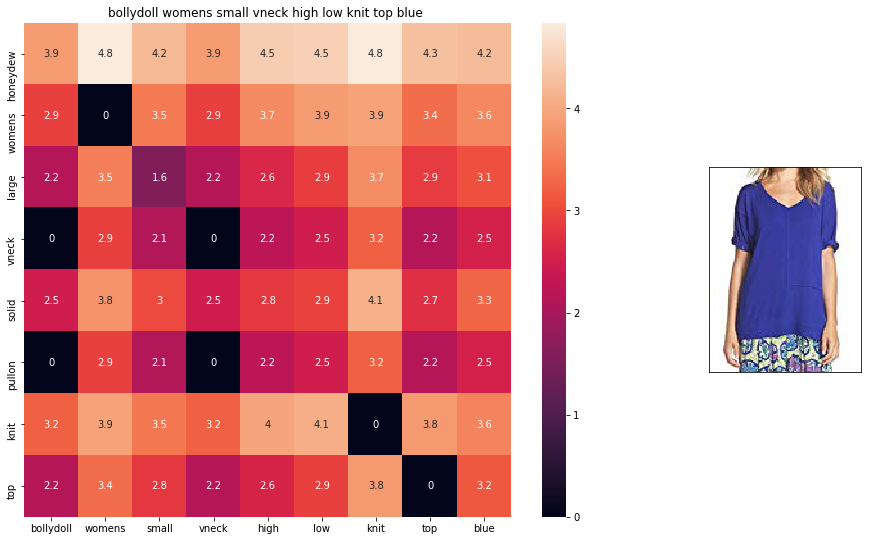

ASIN : B01MRKS9F4
BRAND : Bollydoll
euclidean distance from given input image : 0.7458523


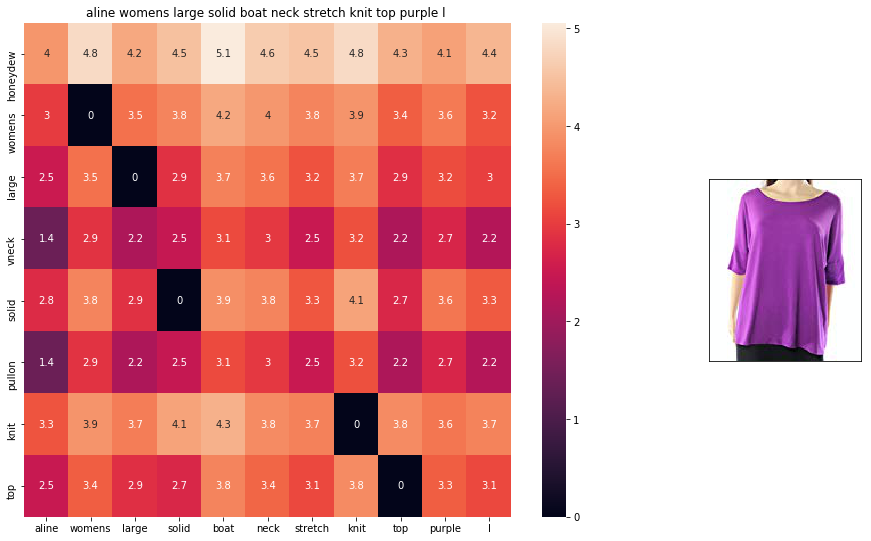

ASIN : B073S6HVB8
BRAND : a_line
euclidean distance from given input image : 0.749572


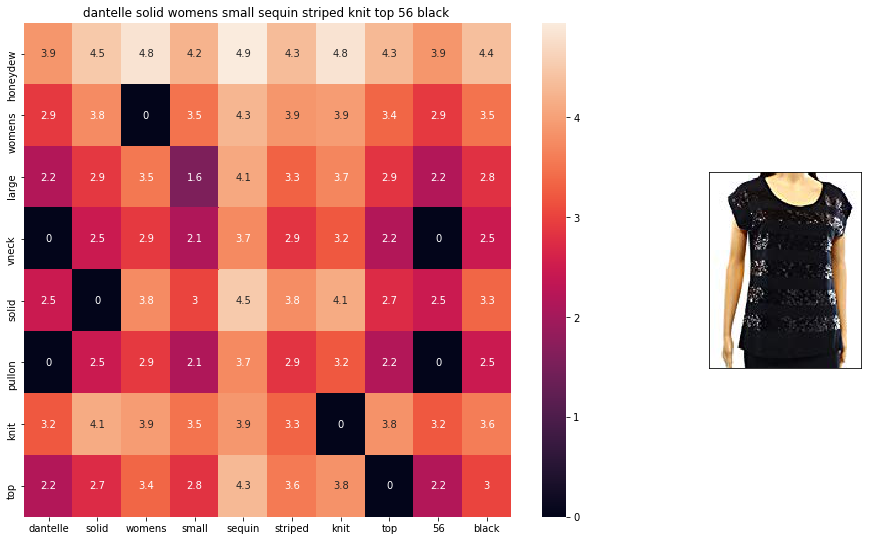

ASIN : B01N9IA557
BRAND : Dantelle
euclidean distance from given input image : 0.75085807


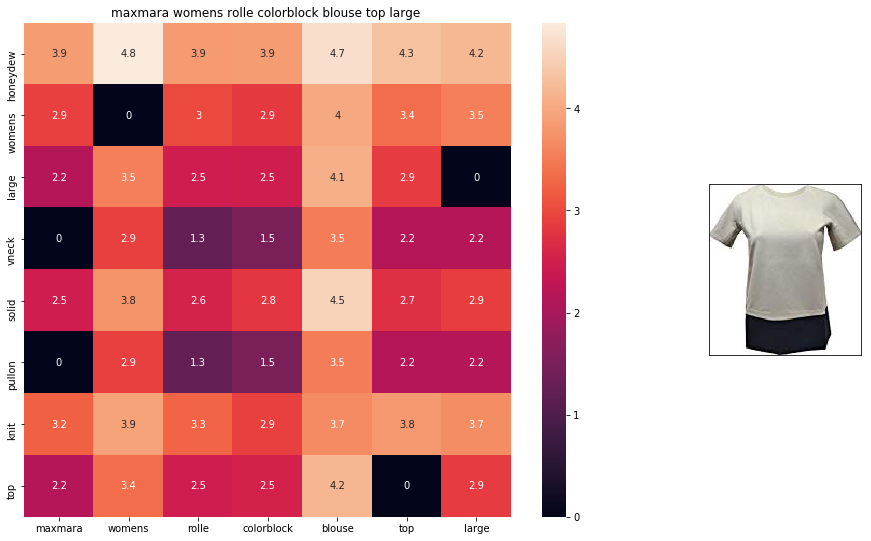

ASIN : B00HCS4AJA
BRAND : MaxMara
euclidean distance from given input image : 0.7513674


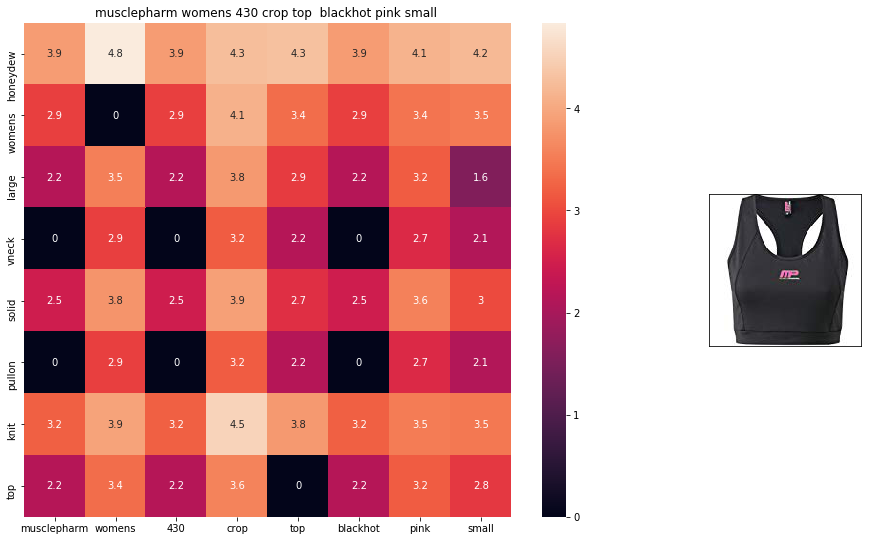

ASIN : B00OZNPHLA
BRAND : Muscle Pharm
euclidean distance from given input image : 0.75216025


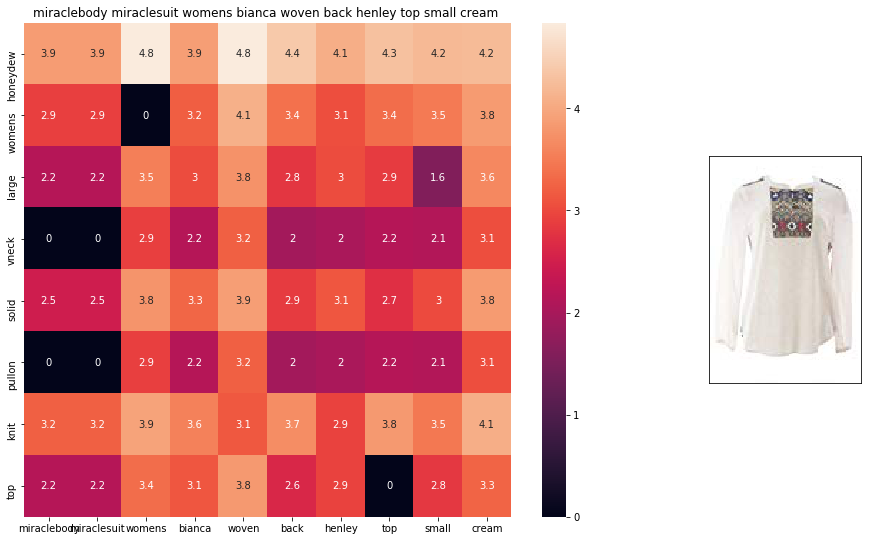

ASIN : B00JXIBP4K
BRAND : Miraclebody by Miraclesuit
euclidean distance from given input image : 0.75370526


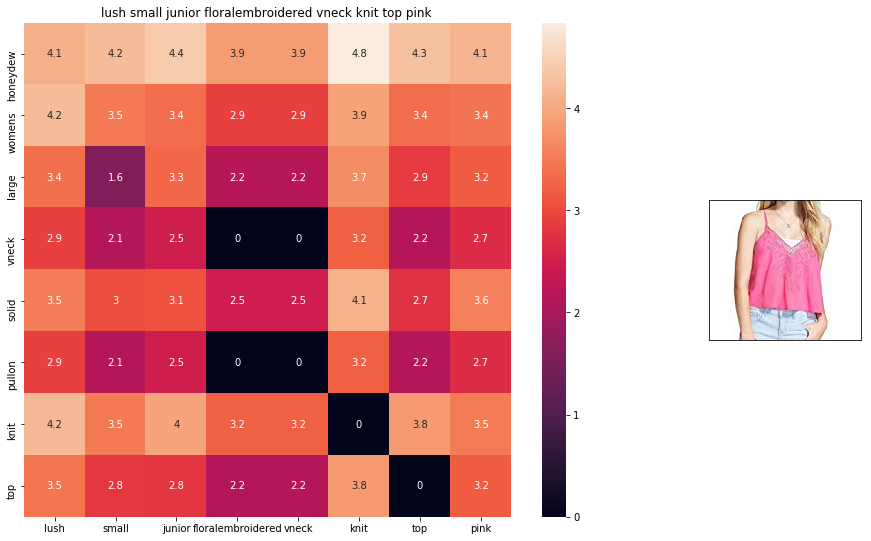

ASIN : B074V9QL7W
BRAND : Lush Clothing
euclidean distance from given input image : 0.7538853


In [66]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(12566, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j


**[9.4] IDF weighted Word2Vec for product similarity**


In [0]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

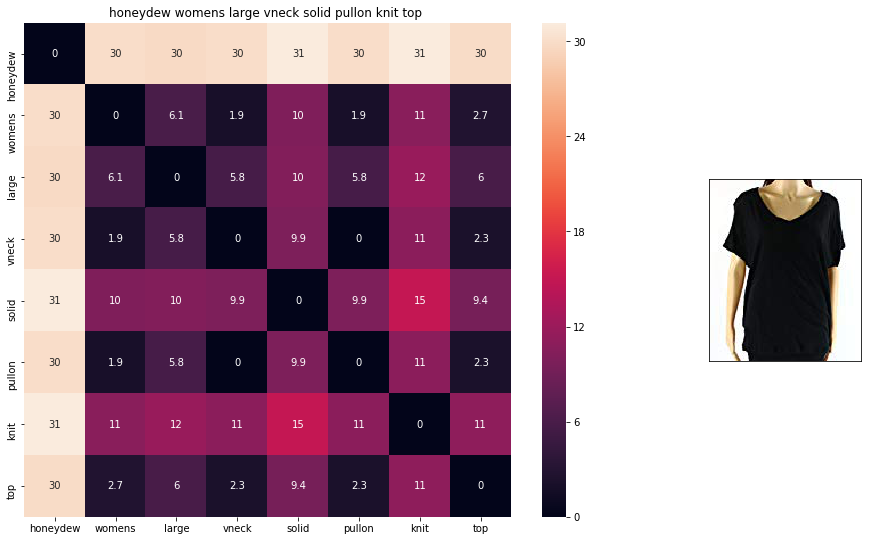

ASIN : B0758RM67F
Brand : Honeydew
euclidean distance from input : 0.0


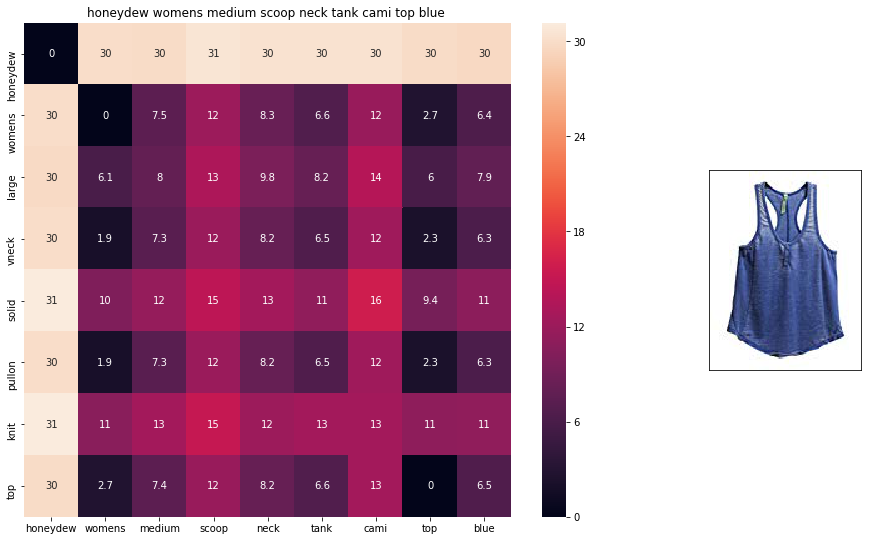

ASIN : B01M3YPYKI
Brand : Honeydew
euclidean distance from input : 2.988043


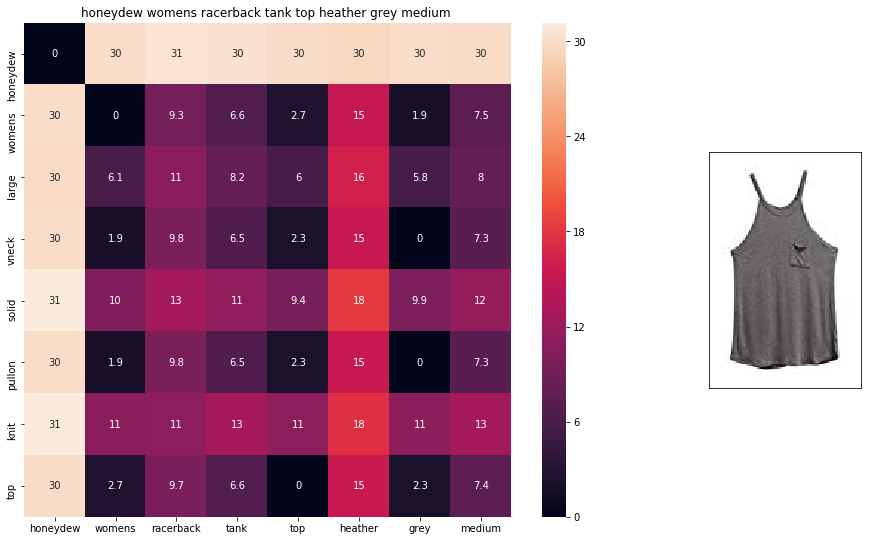

ASIN : B06Y3Z8VKY
Brand : Honeydew
euclidean distance from input : 3.1152225


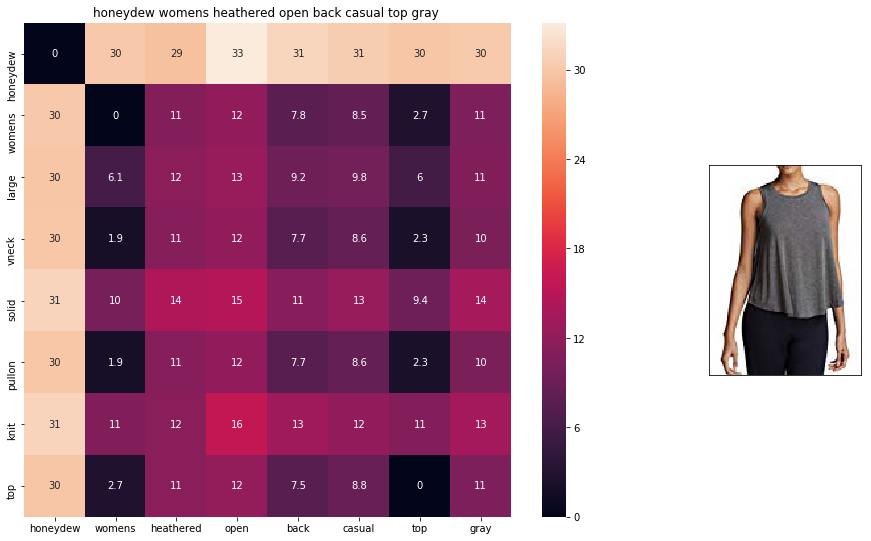

ASIN : B01M3Y4Q4Q
Brand : Honeydew
euclidean distance from input : 3.2379568


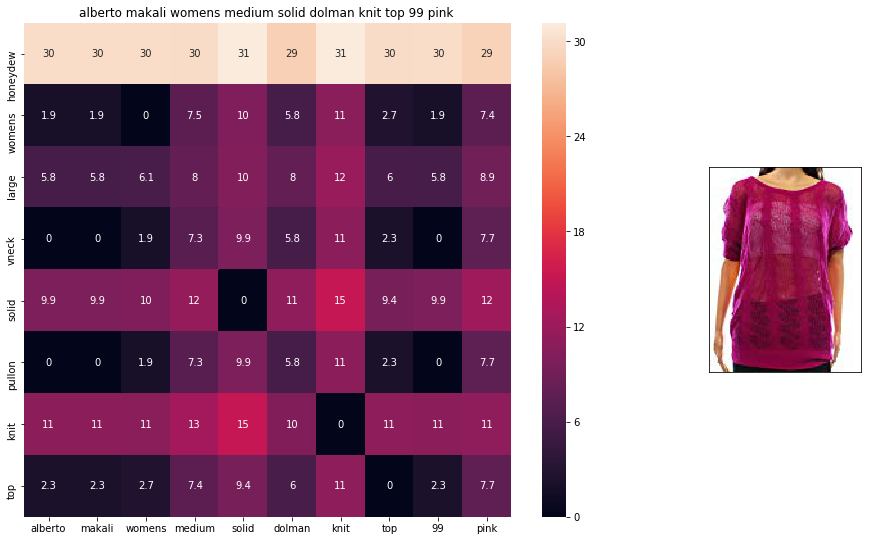

ASIN : B072QF6DX6
Brand : Alberto Makali
euclidean distance from input : 3.7076936


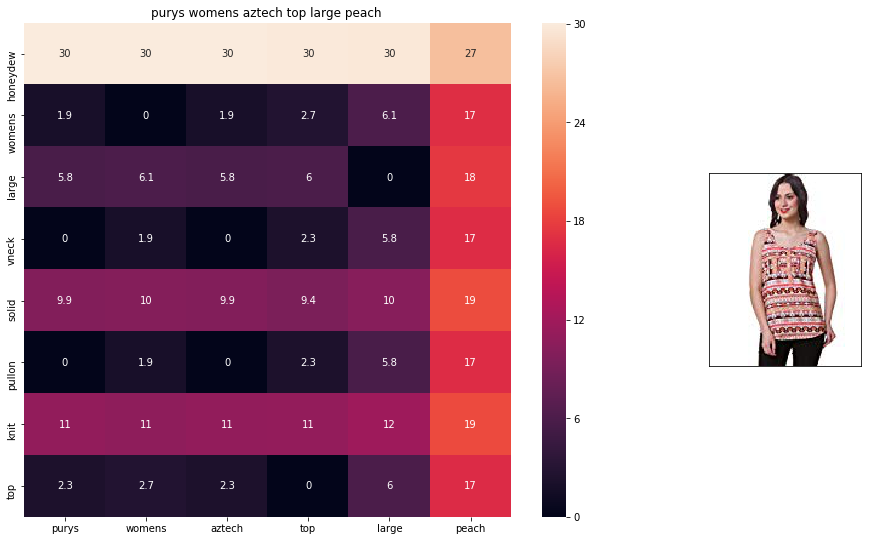

ASIN : B00VSZCUDG
Brand : Purys
euclidean distance from input : 3.823118


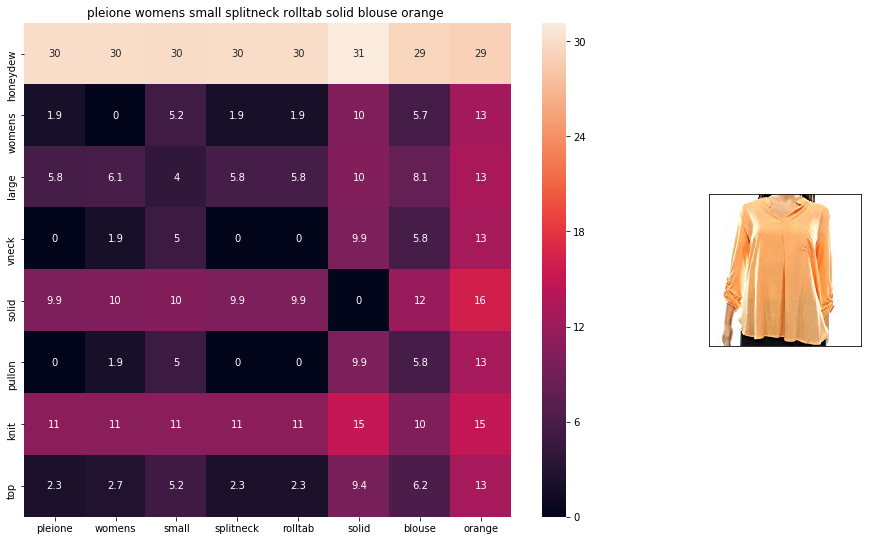

ASIN : B071G16FWF
Brand : Pleione
euclidean distance from input : 3.8244648


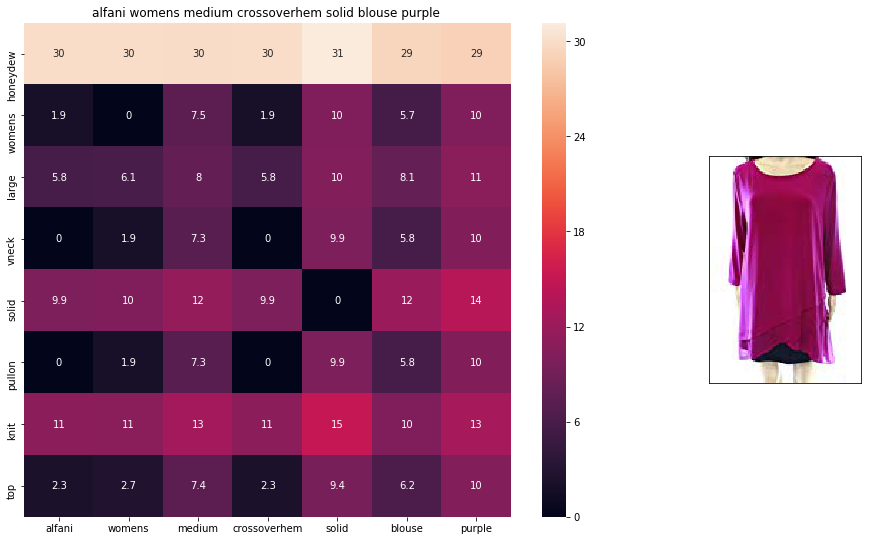

ASIN : B071NKX2VJ
Brand : Alfani
euclidean distance from input : 3.8917668


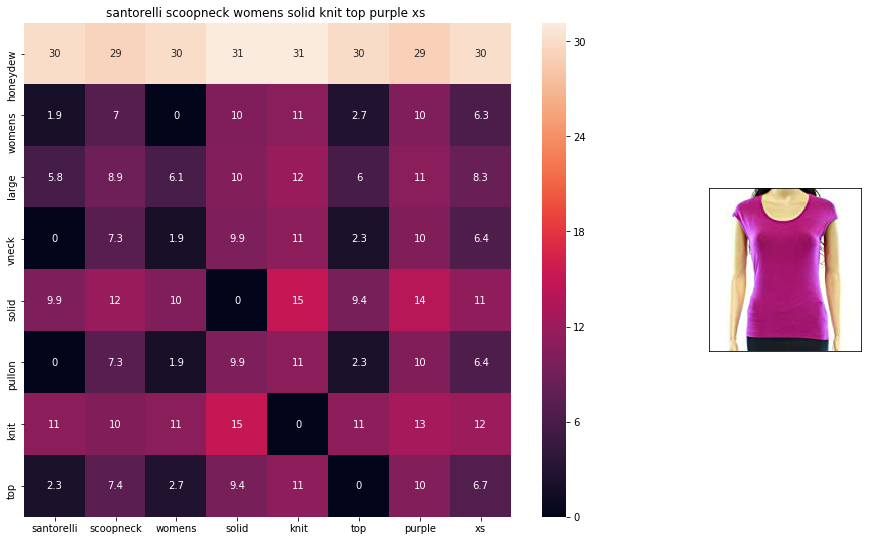

ASIN : B074QW18HZ
Brand : Santorelli
euclidean distance from input : 3.8953972


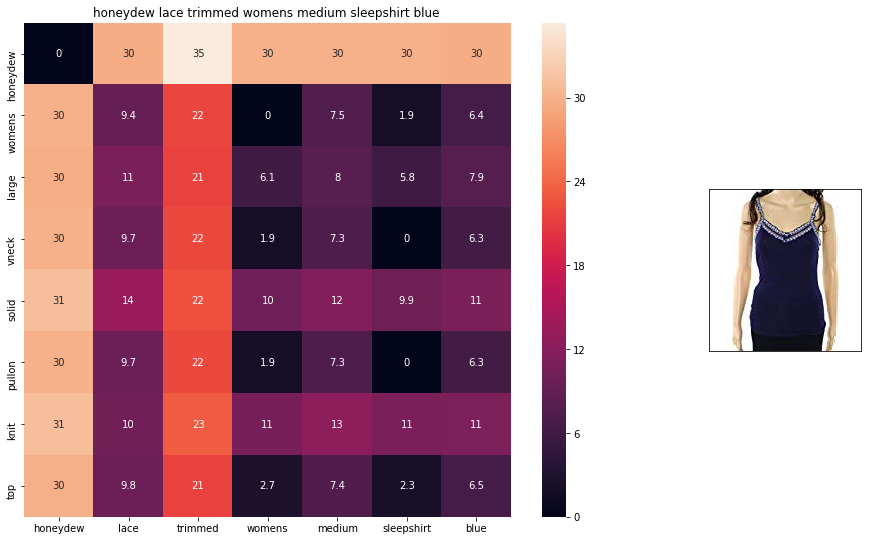

ASIN : B071S9PPDT
Brand : Honeydew
euclidean distance from input : 3.9160726


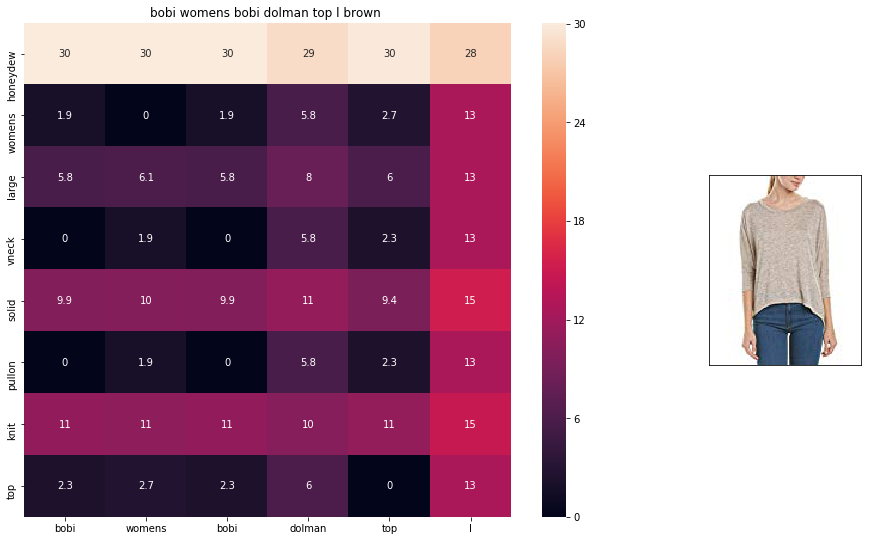

ASIN : B06ZZX46Z6
Brand : Bobi
euclidean distance from input : 3.9558156


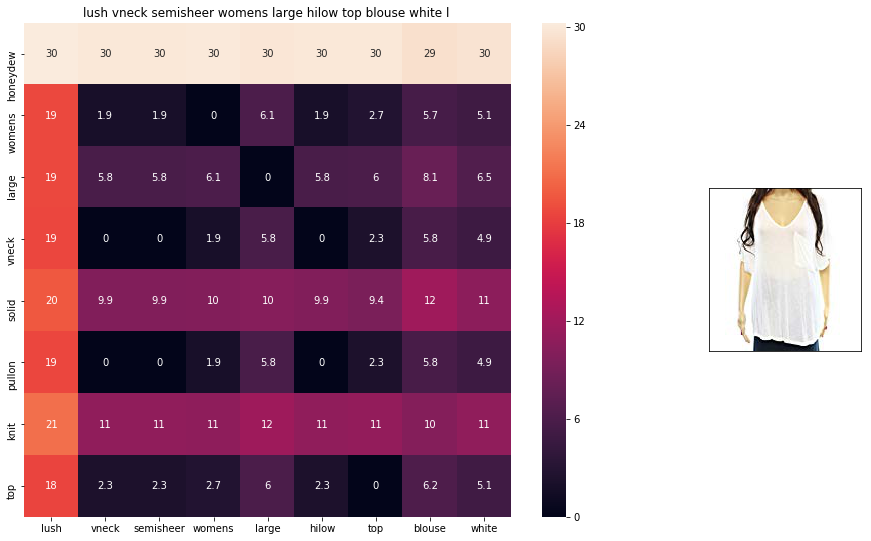

ASIN : B074QTDZTF
Brand : Lush Clothing
euclidean distance from input : 4.0224686


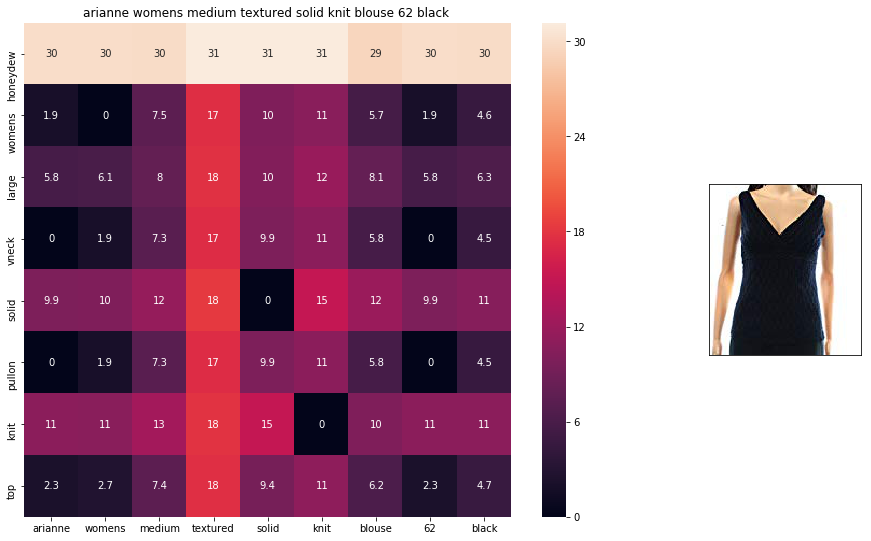

ASIN : B071PB5NSX
Brand : Arianne
euclidean distance from input : 4.026459


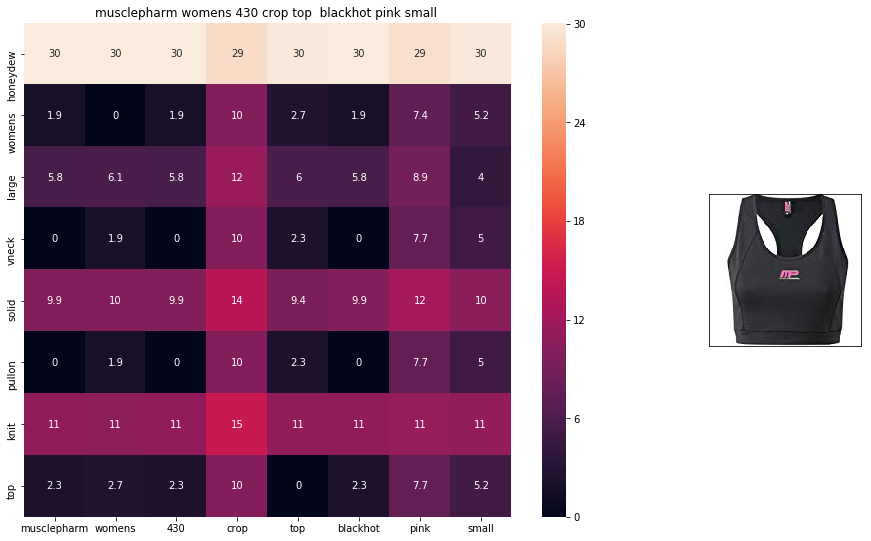

ASIN : B00OZNPHLA
Brand : Muscle Pharm
euclidean distance from input : 4.0271707


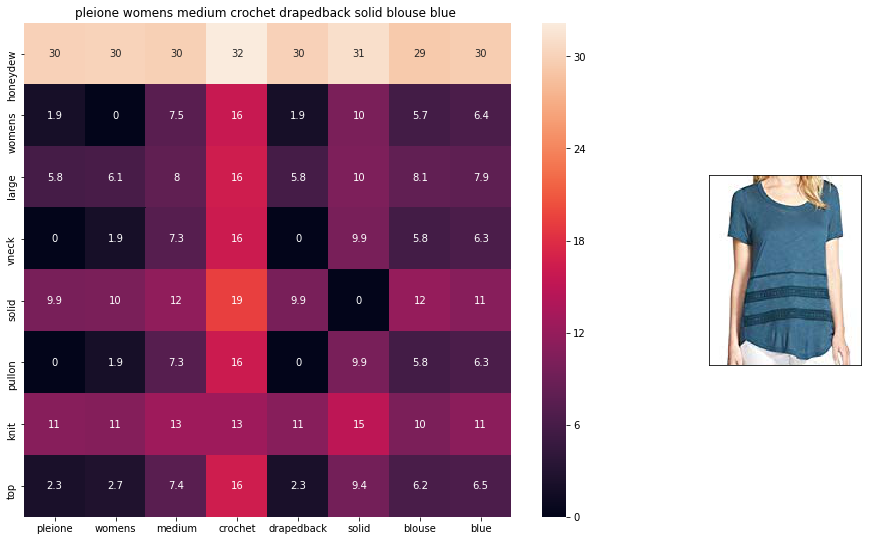

ASIN : B074MJDMXC
Brand : Pleione
euclidean distance from input : 4.027823


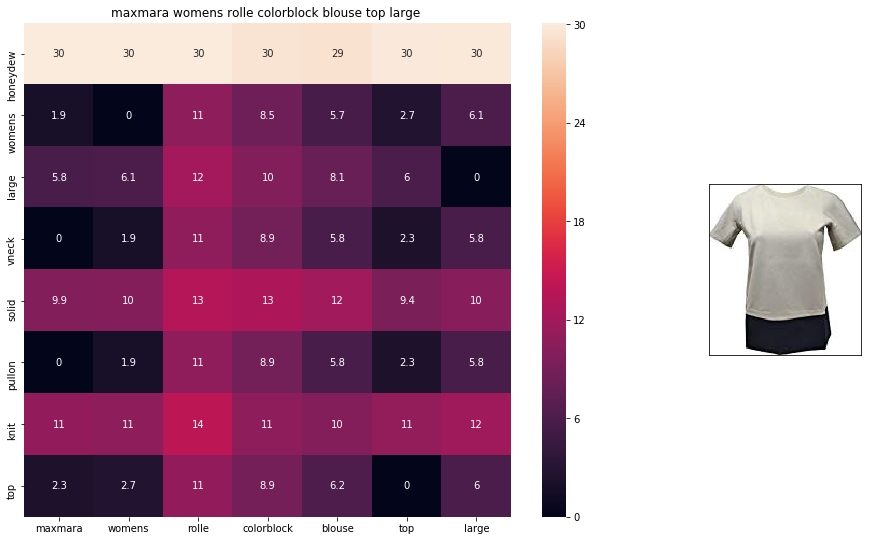

ASIN : B00HCS4AJA
Brand : MaxMara
euclidean distance from input : 4.0416036


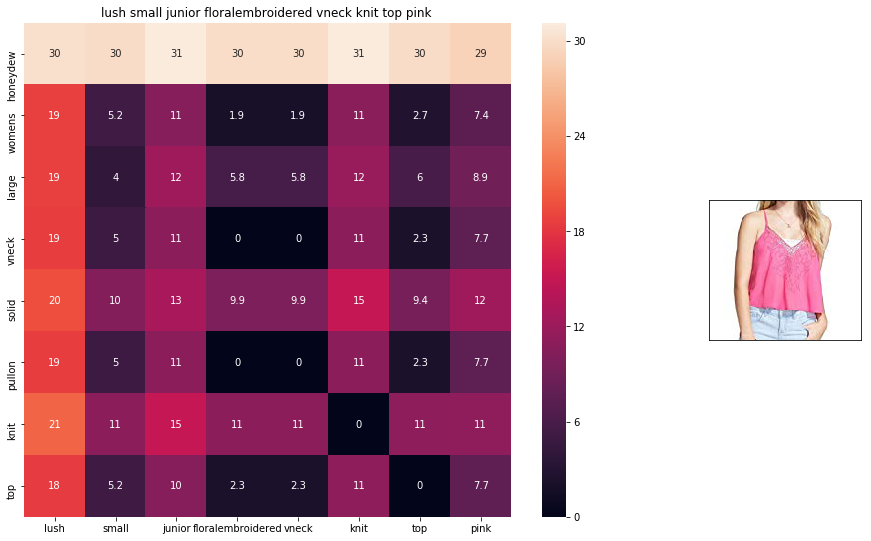

ASIN : B074V9QL7W
Brand : Lush Clothing
euclidean distance from input : 4.055318


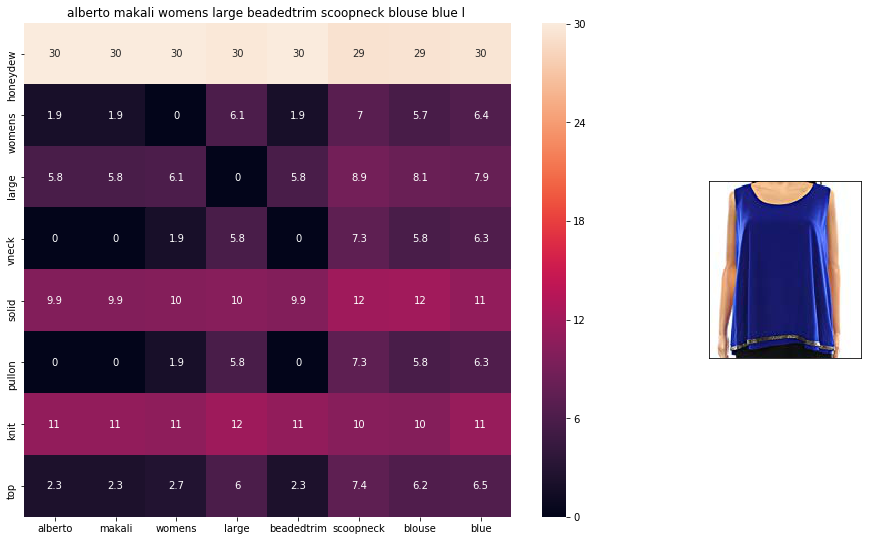

ASIN : B074QTXNSM
Brand : Alberto Makali
euclidean distance from input : 4.0584283


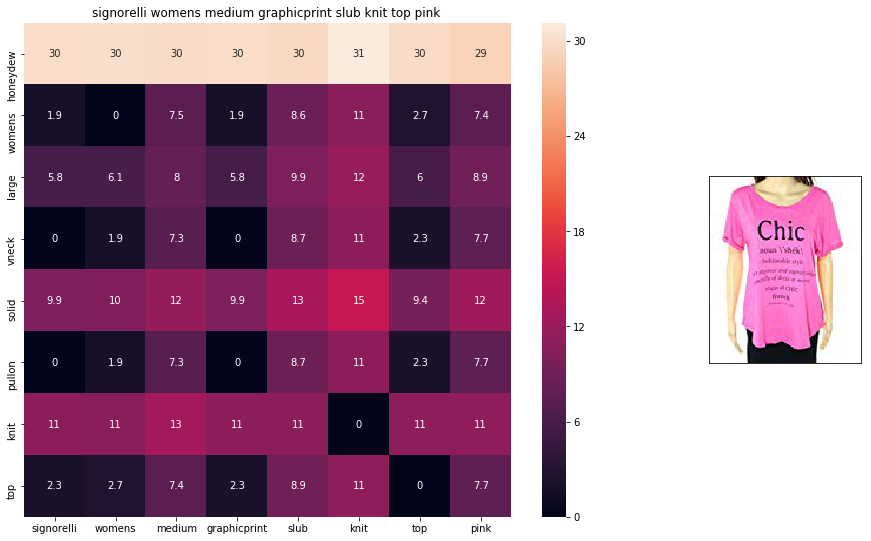

ASIN : B074VCHKSP
Brand : Signorelli
euclidean distance from input : 4.0642195


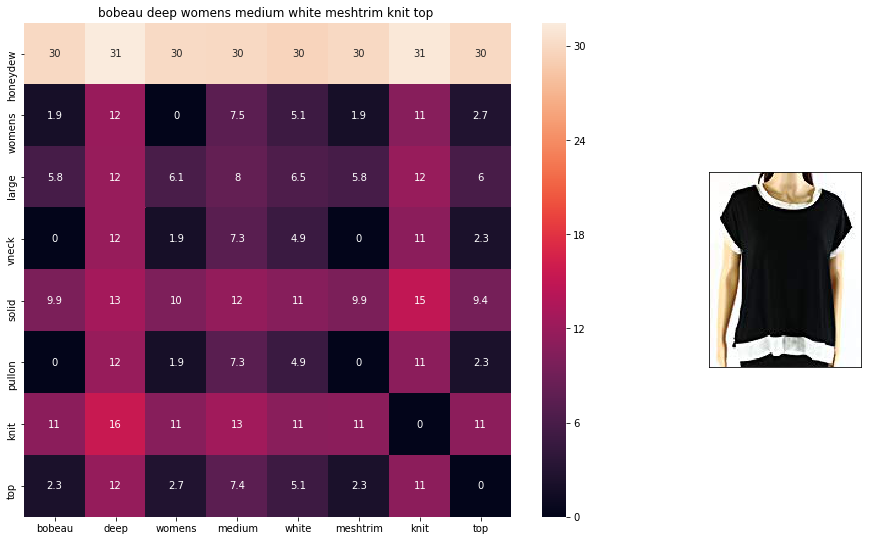

ASIN : B0758WTXZK
Brand : Bobeau
euclidean distance from input : 4.079522


In [68]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

weighted_w2v_model(12566, 20)
#931
#12566
# in the give heat map, each cell contains the euclidean distance between words i, j


**[9.6] Weighted similarity using brand and color.**


In [0]:
# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )
data['product_type_name'].fillna(value="Not given", inplace=True )
data['color'].fillna(value="Not given", inplace=True )
# replace spaces with hypen
brands = [x.replace(" ","-") for x in data['brand'].values]
types = [x.replace(" ","-") for x in data['product_type_name'].values]
colors = [x.replace(" ","-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [0]:
def heat_map_w2v_brand(sentance1, sentance2, url, doc_id1, doc_id2, df_id1, df_id2, model):
    
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # df_id1: index of document1 in the data frame
    # df_id2: index of document2 in the data frame
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title2 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)
   
    data_matrix = [['Asin','Brand', 'Color', 'Product type'],
               [data['asin'].loc[df_id1],brands[doc_id1], colors[doc_id1], types[doc_id1]], # input apparel's features
               [data['asin'].loc[df_id2],brands[doc_id2], colors[doc_id2], types[doc_id2]]] # recommonded apparel's features
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column 
    
    # we create a table with the data_matrix
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    # plot it with plotly
    plotly.offline.iplot(table, filename='simple_table')
    
    # devide whole figure space into 25 * 1:10 grids
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    
    # in first 25*10 grids we plot heatmap
    ax1 = plt.subplot(gs[:, :-5])
    # ploting the heap map based on the pairwise distances
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    # set the x axis labels as recommended apparels title
    ax1.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax1.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax1.set_title(sentance2)

    # in last 25 * 10:15 grids we display image
    ax2 = plt.subplot(gs[:, 10:16])
    # we dont display grid lins and axis labels to images
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # pass the url it display it
    display_img(url, ax2, fig)
    
    plt.show()

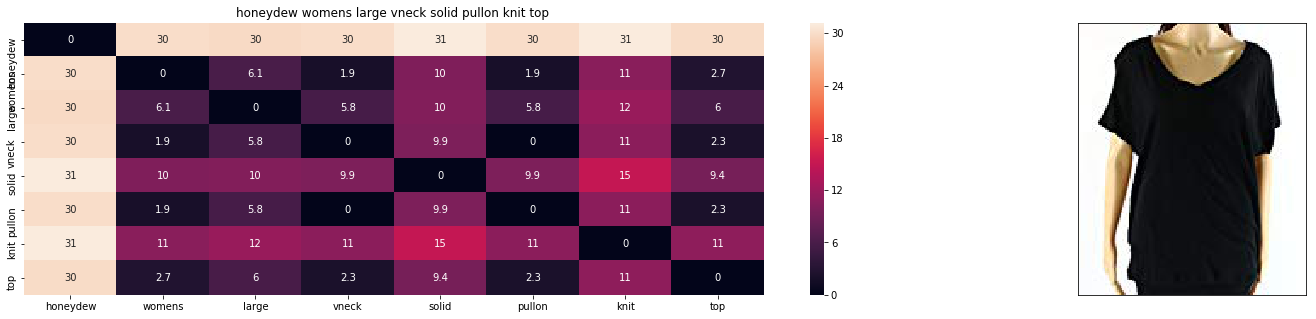

ASIN : B0758RM67F
Brand : Honeydew
euclidean distance from input : 0.0


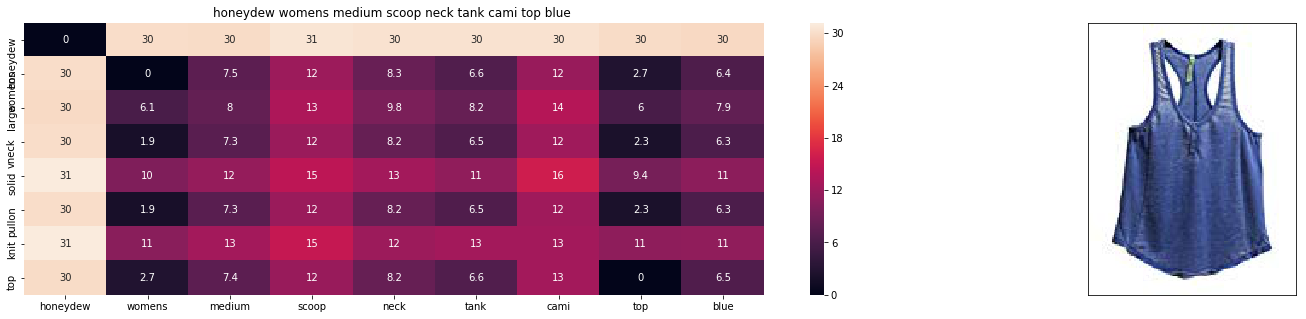

ASIN : B01M3YPYKI
Brand : Honeydew
euclidean distance from input : 2.494021511077881


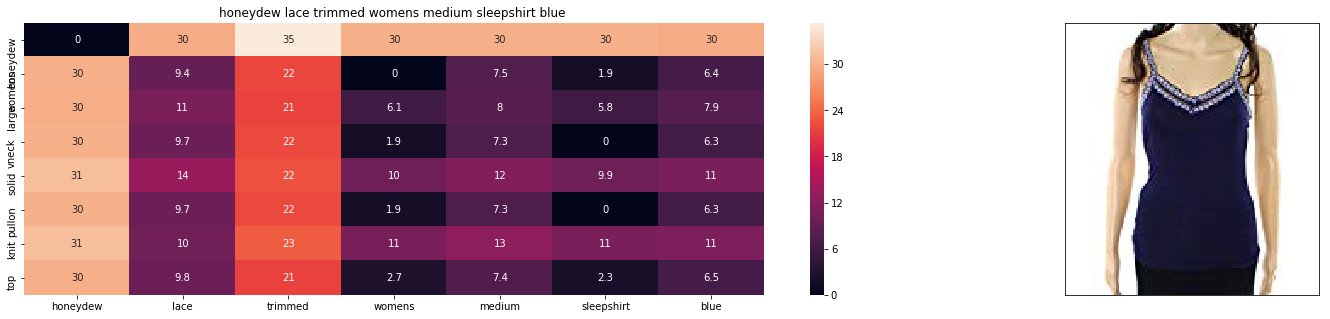

ASIN : B071S9PPDT
Brand : Honeydew
euclidean distance from input : 2.6651430131811766


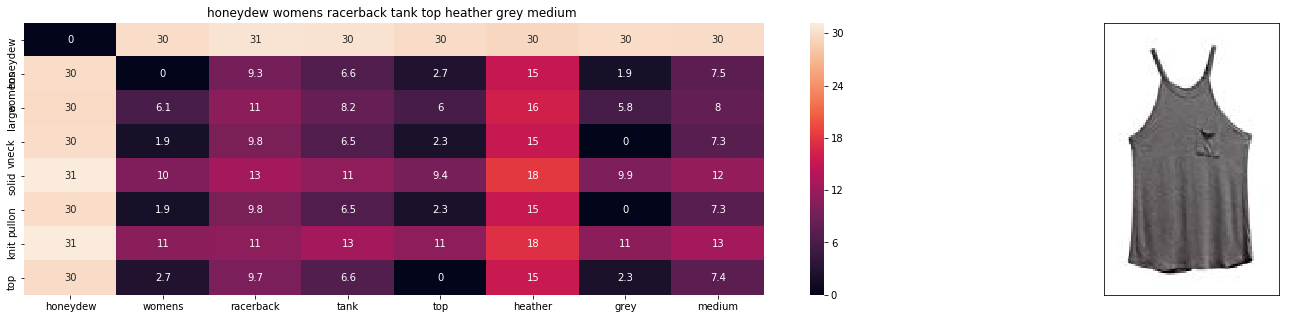

ASIN : B06Y3Z8VKY
Brand : Honeydew
euclidean distance from input : 2.675645263469133


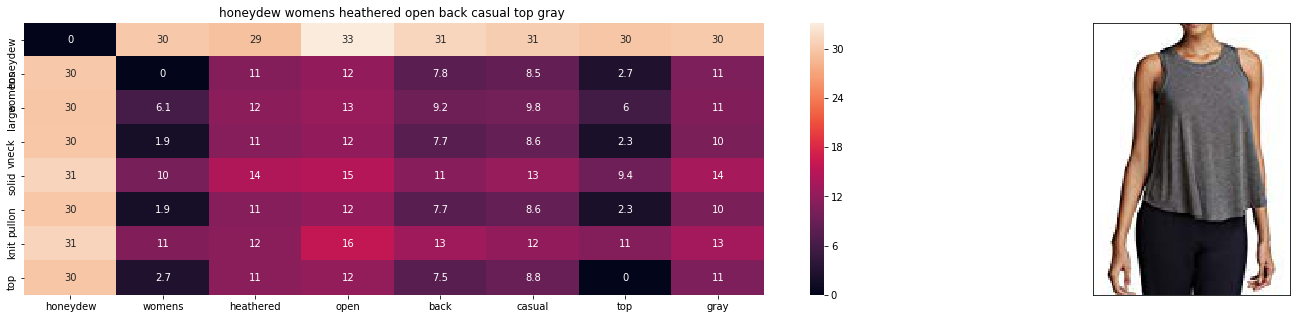

ASIN : B01M3Y4Q4Q
Brand : Honeydew
euclidean distance from input : 2.7370122983812424


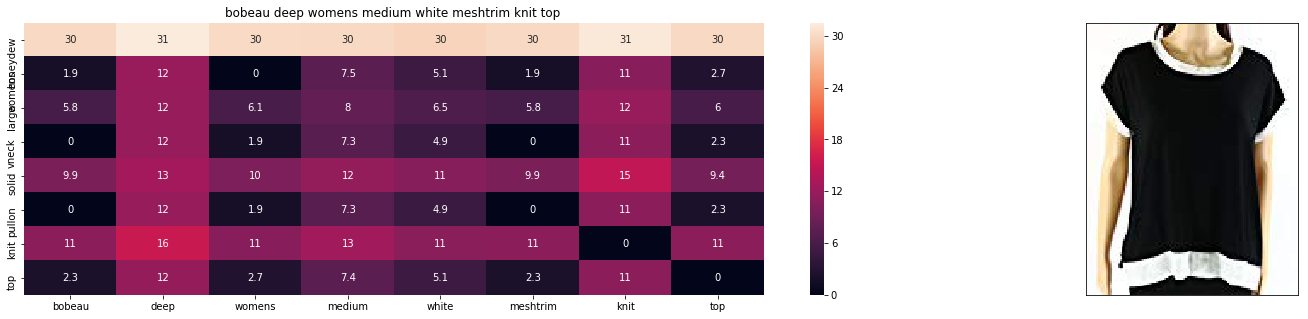

ASIN : B0758WTXZK
Brand : Bobeau
euclidean distance from input : 2.7468677522558833


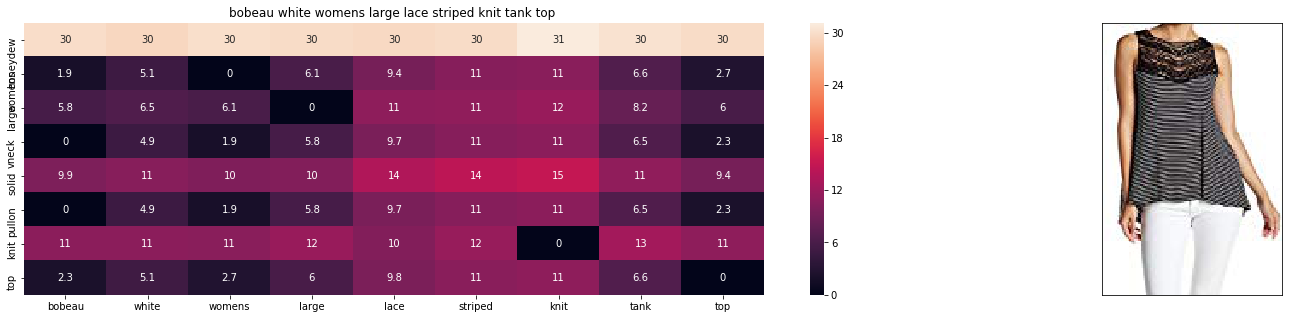

ASIN : B0758TYBLZ
Brand : Bobeau
euclidean distance from input : 2.7680034639258055


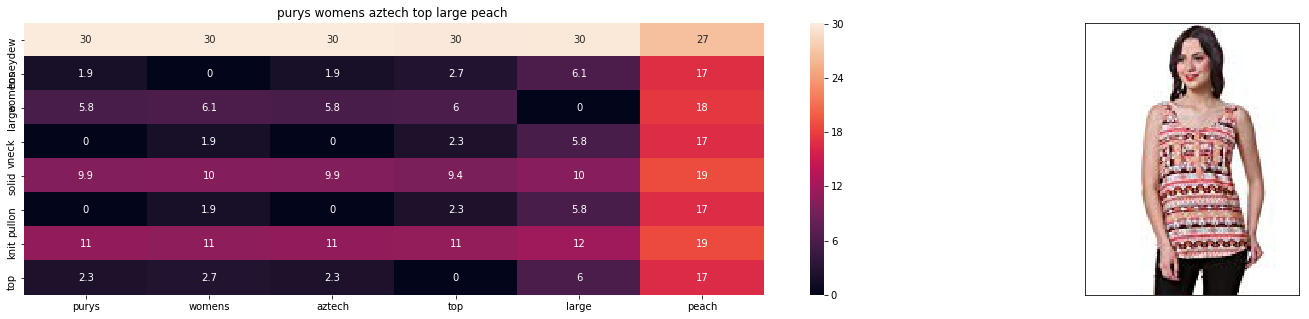

ASIN : B00VSZCUDG
Brand : Purys
euclidean distance from input : 2.91155891418457


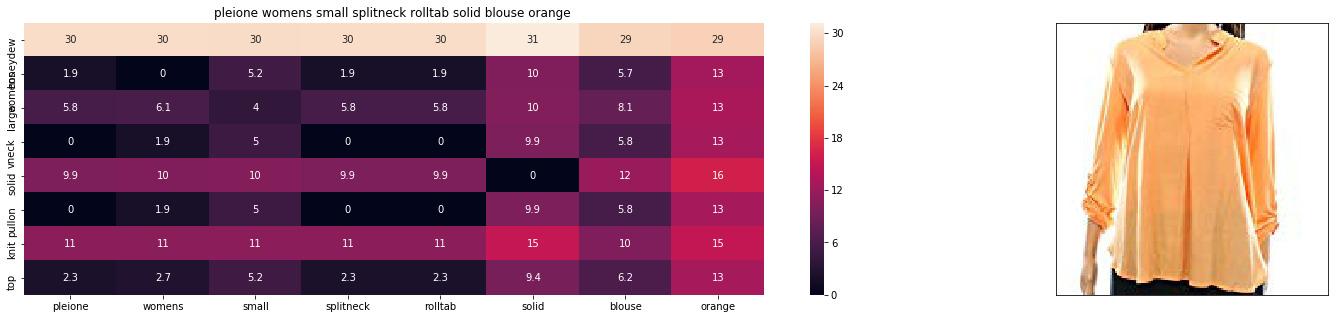

ASIN : B071G16FWF
Brand : Pleione
euclidean distance from input : 2.9122323989868164


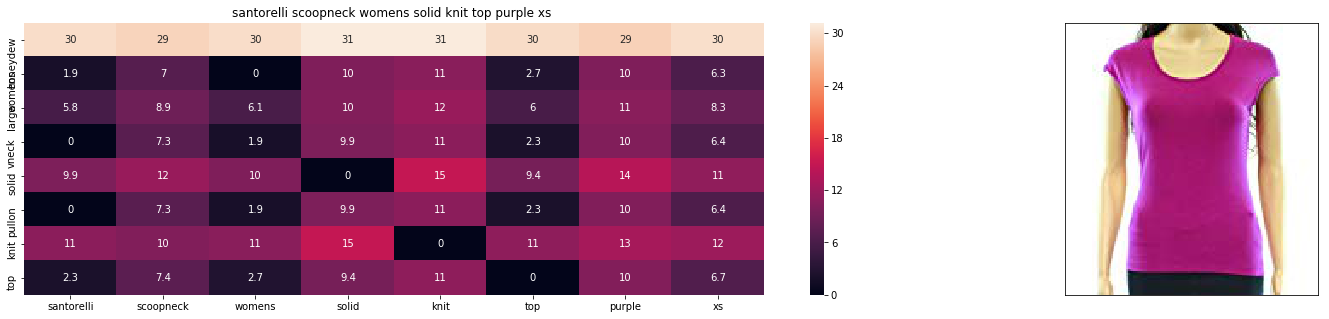

ASIN : B074QW18HZ
Brand : Santorelli
euclidean distance from input : 2.9476985931396484


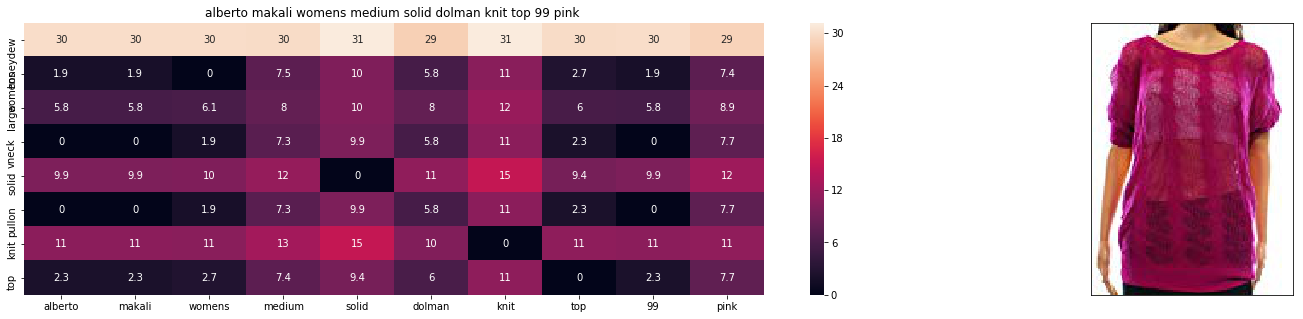

ASIN : B072QF6DX6
Brand : Alberto Makali
euclidean distance from input : 2.9718807294725513


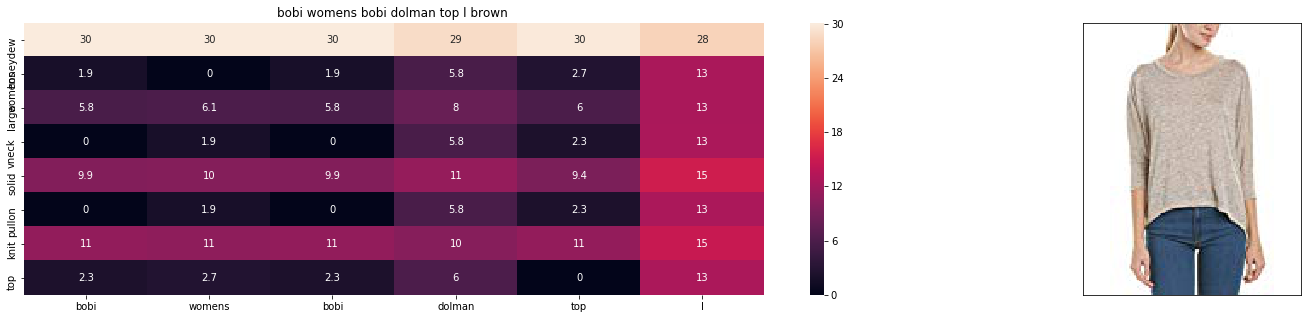

ASIN : B06ZZX46Z6
Brand : Bobi
euclidean distance from input : 2.9779077529907227


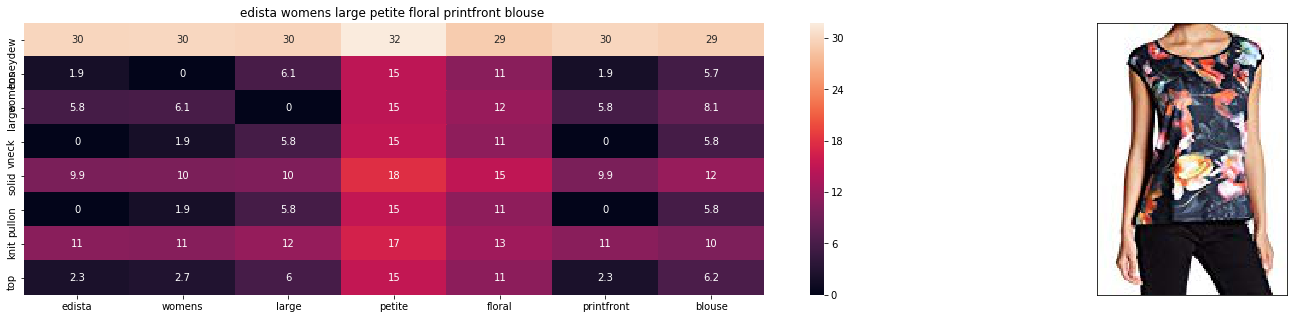

ASIN : B0758NZXPV
Brand : Edista
euclidean distance from input : 2.987677765073266


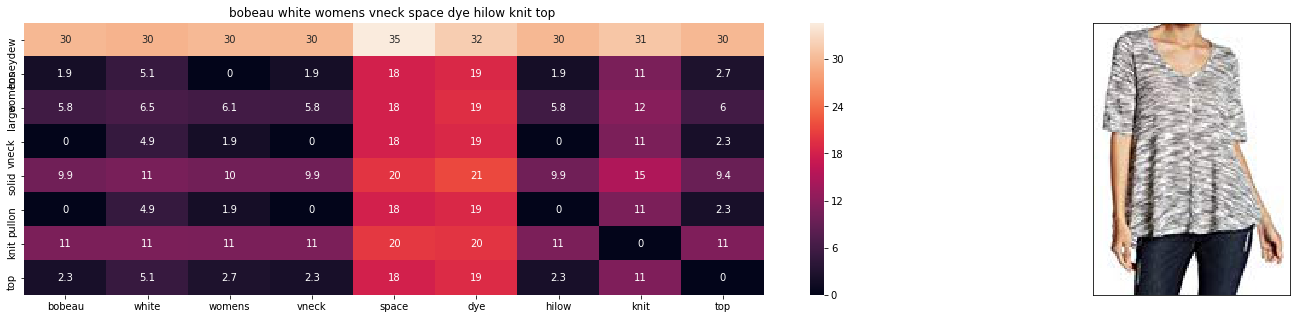

ASIN : B0758ZS3DC
Brand : Bobeau
euclidean distance from input : 2.989093017758813


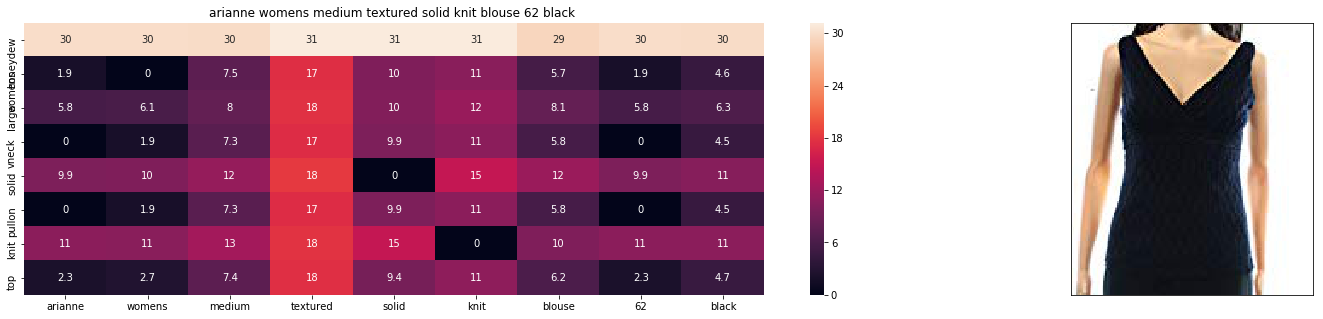

ASIN : B071PB5NSX
Brand : Arianne
euclidean distance from input : 3.013229560852051


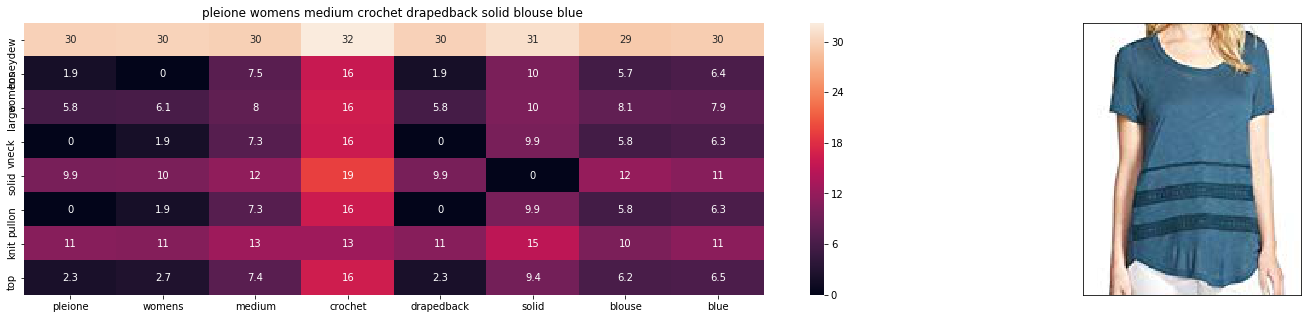

ASIN : B074MJDMXC
Brand : Pleione
euclidean distance from input : 3.0139114379882814


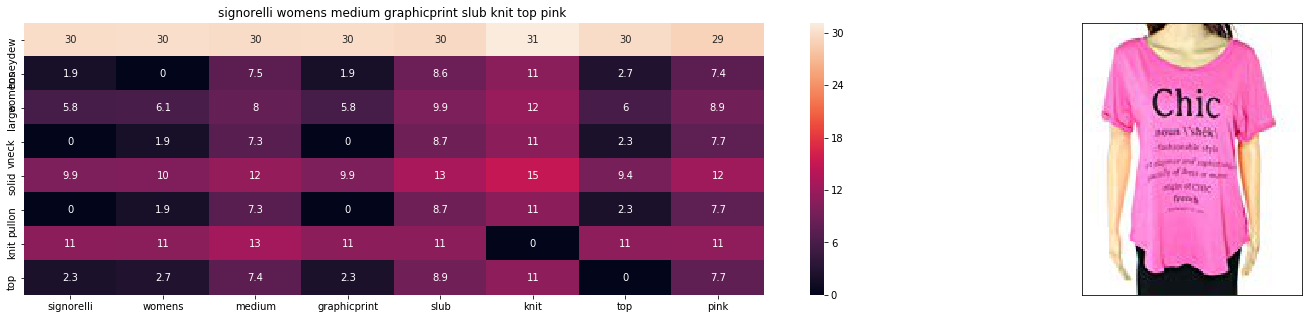

ASIN : B074VCHKSP
Brand : Signorelli
euclidean distance from input : 3.032109832763672


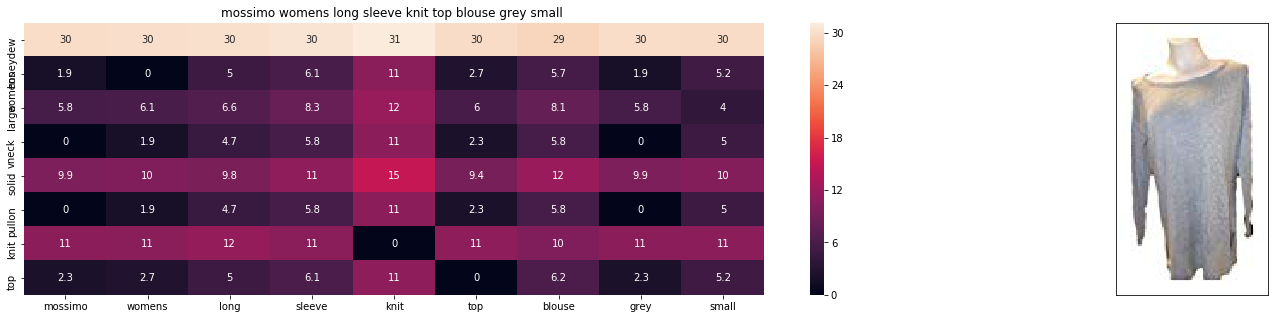

ASIN : B071LTQV1R
Brand : Mossimo
euclidean distance from input : 3.0422306060791016


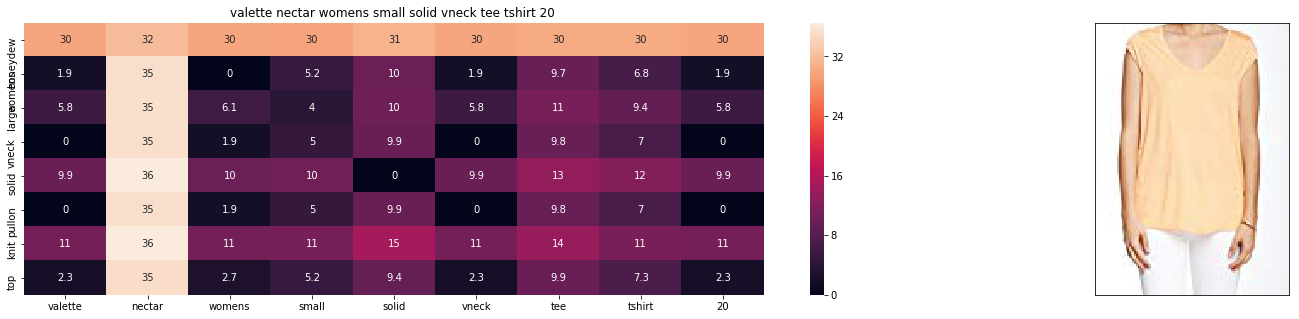

ASIN : B0758PKVTJ
Brand : Valette
euclidean distance from input : 3.0530025482177736


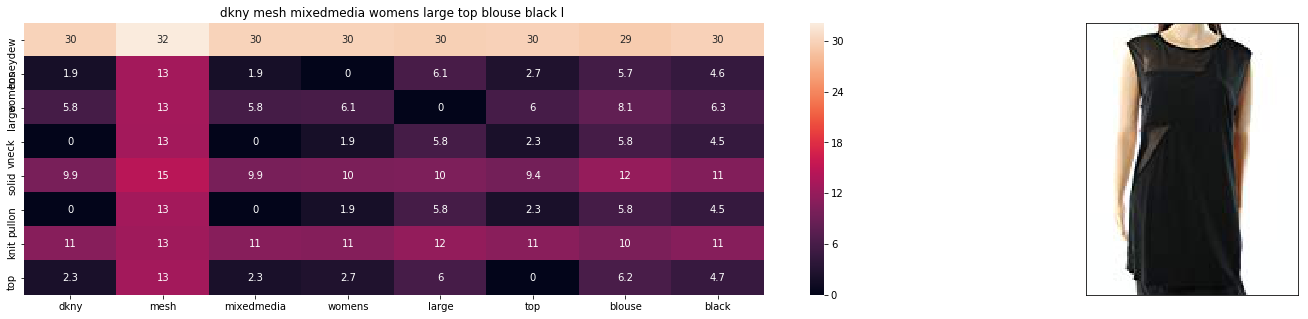

ASIN : B0759XF7H9
Brand : DKNY
euclidean distance from input : 3.0547597885131834


In [75]:
def idf_w2v_brand(doc_id, w1, w2, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

idf_w2v_brand(12566, 5, 5, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j

**[10.2] Keras and Tensorflow to extract features**


In [76]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

Using TensorFlow backend.


**[10.3] Visual features based product similarity**

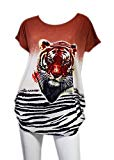

Product Title:  burnt umber tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 6.32596e-06
Amazon Url: www.amzon.com/dp/B00JXQB5FQ


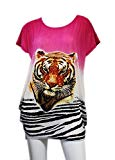

Product Title:  pink tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 30.05017
Amazon Url: www.amzon.com/dp/B00JXQASS6


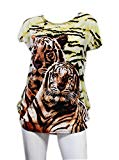

Product Title:  yellow tiger tshirt tiger stripes  l 
Euclidean Distance from input image: 41.261116
Amazon Url: www.amzon.com/dp/B00JXQCUIC


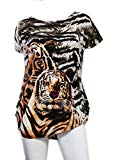

Product Title:  brown  white tiger tshirt tiger stripes xl  xxl 
Euclidean Distance from input image: 44.000156
Amazon Url: www.amzon.com/dp/B00JXQCWTO


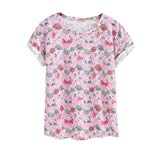

Product Title:  kawaii pastel tops tees pink flower design 
Euclidean Distance from input image: 47.38248
Amazon Url: www.amzon.com/dp/B071FCWD97


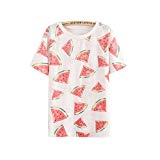

Product Title:  womens thin style tops tees pastel watermelon print 
Euclidean Distance from input image: 47.71842
Amazon Url: www.amzon.com/dp/B01JUNHBRM


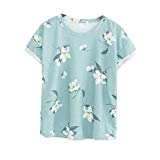

Product Title:  kawaii pastel tops tees baby blue flower design 
Euclidean Distance from input image: 47.90206
Amazon Url: www.amzon.com/dp/B071SBCY9W


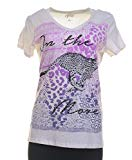

Product Title:  edv cheetah run purple multi xl 
Euclidean Distance from input image: 48.046482
Amazon Url: www.amzon.com/dp/B01CUPYBM0


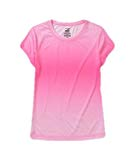

Product Title:  danskin womens vneck loose performance tee xsmall pink ombre 
Euclidean Distance from input image: 48.101837
Amazon Url: www.amzon.com/dp/B01F7PHXY8


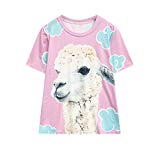

Product Title:  summer alpaca 3d pastel casual loose tops tee design 
Euclidean Distance from input image: 48.118866
Amazon Url: www.amzon.com/dp/B01I80A93G


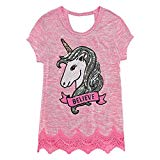

Product Title:  miss chievous juniors striped peplum tank top medium shadowpeach 
Euclidean Distance from input image: 48.13122
Amazon Url: www.amzon.com/dp/B0177DM70S


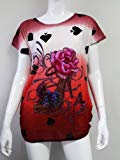

Product Title:  red  pink floral heel sleeveless shirt xl  xxl 
Euclidean Distance from input image: 48.16945
Amazon Url: www.amzon.com/dp/B00JV63QQE


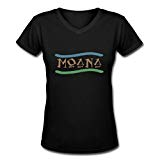

Product Title:  moana logo adults hot v neck shirt black xxl 
Euclidean Distance from input image: 48.256786
Amazon Url: www.amzon.com/dp/B01LX6H43D


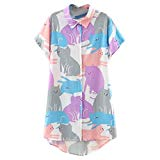

Product Title:  abaday multicolor cartoon cat print short sleeve longline shirt large 
Euclidean Distance from input image: 48.265686
Amazon Url: www.amzon.com/dp/B01CR57YY0


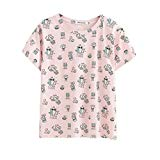

Product Title:  kawaii cotton pastel tops tees peach pink cactus design 
Euclidean Distance from input image: 48.362602
Amazon Url: www.amzon.com/dp/B071WYLBZS


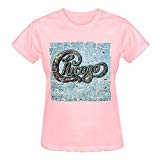

Product Title:  chicago chicago 18 shirt women pink 
Euclidean Distance from input image: 48.383606
Amazon Url: www.amzon.com/dp/B01GXAZTRY


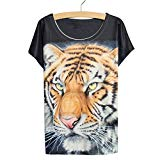

Product Title:  yichun womens tiger printed summer tshirts tops 
Euclidean Distance from input image: 48.449356
Amazon Url: www.amzon.com/dp/B010NN9RXO


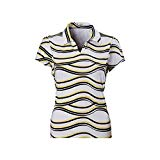

Product Title:  nancy lopez whimsy short sleeve  whiteblacklemon drop  xs 
Euclidean Distance from input image: 48.47889
Amazon Url: www.amzon.com/dp/B01MPX6IDX


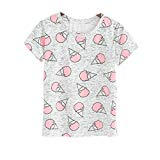

Product Title:  womens tops tees pastel peach ice cream cone print 
Euclidean Distance from input image: 48.557957
Amazon Url: www.amzon.com/dp/B0734GRKZL


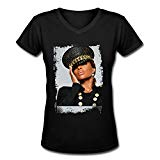

Product Title:  uswomens mary j blige without tshirts shirt 
Euclidean Distance from input image: 48.614372
Amazon Url: www.amzon.com/dp/B01M0XXFKK


In [78]:
#load the features and corresponding ASINS info.
bottleneck_features_train = np.load('/content/gdrive/My Drive/16k_data_cnn_features.npy')
asins = np.load('/content/gdrive/My Drive/16k_data_cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
data = pd.read_pickle('/content/gdrive/My Drive/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])


from IPython.display import display, Image, SVG, Math, YouTubeVideo


#get similar products using CNN features (VGG-16)
def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products_cnn(12566, 20)
